# a_2d_image_data.ipynb

In [ ]:
import imageio.v2 as imageio
import torch
import os

''' 이미지 파일을 읽어와 텐서로 변환'''
# os.path.join을 이용해 이미지 파일 경로를 생성하고 이미지 읽기
img_arr = imageio.imread(os.path.join(os.path.pardir, os.path.pardir, "_00_data", "a_image-dog", "bobby.jpg"))

# 이미지 배열의 타입, 크기, 데이터 타입 출력
print(type(img_arr))  # >>> <class 'numpy.ndarray'>
print(img_arr.shape)  # >>> (height, width, channels) 예: (256, 256, 3)
print(img_arr.dtype)  # >>> uint8 (이미지 데이터는 보통 8비트 정수)

# numpy 배열을 PyTorch 텐서로 변환
img = torch.from_numpy(img_arr)

# 텐서의 차원 순서 변경: (H, W, C) -> (C, H, W)로 변경하여 PyTorch 텐서 형식에 맞춤
out = img.permute(2, 0, 1)
print(out.shape)  # >>> torch.Size([3, height, width])

print("#" * 50, 1)

<class 'numpy.ndarray'>
(720, 1280, 3)
uint8
torch.Size([3, 720, 1280])
################################################## 1


In [ ]:
'''디렉토리에서 여러 이미지 파일 읽기'''
# os.path.join을 사용하여 여러 이미지가 저장된 디렉토리 경로 생성
data_dir = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "b_image-cats")

# 디렉토리에서 .png 확장자를 가진 파일 이름들만 선택하여 리스트에 저장
filenames = [
  name for name in os.listdir(data_dir) if os.path.splitext(name)[-1] == '.png'
]
print(filenames)  # >>> ['cat1.png', 'cat2.png', ...]

from PIL import Image

# 파일 목록을 순회하며 각 이미지를 읽고 화면에 표시
for i, filename in enumerate(filenames):
  image = Image.open(os.path.join(data_dir, filename))  # PIL을 이용해 이미지 파일 열기
  image.show()  # 이미지를 화면에 표시
  img_arr = imageio.imread(os.path.join(data_dir, filename))  # imageio로 이미지 읽기
  print(img_arr.shape)  # 이미지 배열의 크기 출력
  print(img_arr.dtype)  # 이미지 배열의 데이터 타입 출력

['cat1.png', 'cat2.png', 'cat3.png']
(256, 256, 3)
uint8
(256, 256, 3)
uint8
(256, 256, 3)
uint8


In [ ]:
'''배치 텐서 만들기'''
# 배치 크기 지정 및 배치 텐서 생성 (크기: batch_size, 채널, 높이, 너비)
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)

# 각 이미지를 읽어와 텐서로 변환하고 배치 텐서에 저장
for i, filename in enumerate(filenames):
  img_arr = imageio.imread(os.path.join(data_dir, filename))  # 이미지 읽기
  img_t = torch.from_numpy(img_arr)  # numpy 배열을 텐서로 변환
  img_t = img_t.permute(2, 0, 1)  # (H, W, C) -> (C, H, W)로 변경
  batch[i] = img_t  # 배치 텐서의 i번째에 이미지 저장

print(batch.shape)  # >>> torch.Size([3, 3, 256, 256])
# 3개의 이미지가 3개의 채널을 가진 256x256 크기의 텐서로 배치됨

print("#" * 50, 2)


torch.Size([3, 3, 256, 256])
################################################## 2


In [ ]:
'''텐서 데이터 정규화'''
# uint8 타입의 배치 텐서를 float 타입으로 변환하고 값을 0~1 사이로 정규화
batch = batch.float()  # 정수형 텐서를 부동 소수점 텐서로 변환
batch /= 255.0  # 255로 나누어 값을 0~1 사이로 정규화
print(batch.dtype)  # >>> torch.float32
print(batch.shape)  # >>> torch.Size([3, 3, 256, 256])

torch.float32
torch.Size([3, 3, 256, 256])


In [ ]:
'''채널별 평균과 표준편차 계산 및 정규화'''
n_channels = batch.shape[1]  # 이미지의 채널 수 (3)

# 각 채널(R, G, B)에 대해 평균과 표준편차를 계산하고 정규화 수행
for c in range(n_channels):
  mean = torch.mean(batch[:, c])  # 각 채널의 평균 계산
  std = torch.std(batch[:, c])  # 각 채널의 표준편차 계산
  print(mean, std)  # 평균과 표준편차 출력
  # 정규화: (값 - 평균) / 표준편차
  batch[:, c] = (batch[:, c] - mean) / std

tensor(0.5799) tensor(0.2212)
tensor(0.4493) tensor(0.2068)
tensor(0.3554) tensor(0.1931)


# b_3d_image_data.ipynb

In [ ]:
import imageio.v2 as imageio
import os

'''DICOM 볼륨 데이터 읽기'''
# DICOM 파일이 저장된 디렉토리 경로를 설정
dir_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "c_volumetric-dicom", "2-LUNG_3.0_B70f-04083")

# DICOM 볼륨 데이터를 읽어 numpy 배열로 변환
vol_array = imageio.volread(dir_path, format='DICOM')

# 읽어들인 DICOM 볼륨 데이터의 타입, 크기 및 데이터 타입 출력
print(type(vol_array))   # >>> <class 'imageio.core.util.Array'>: Numpy NDArray
print(vol_array.shape)   # >>> (99, 512, 512)  (99개의 슬라이스, 각 슬라이스는 512x512 픽셀)
print(vol_array.dtype)   # >>> int16 (16비트 정수로 저장된 픽셀 값)
print(vol_array[0])  # 첫 번째 슬라이스의 픽셀 값 출력

print("#" * 50, 1)


Reading DICOM (examining files): 99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 99/99  (100.0%)
<class 'imageio.core.util.Array'>
(99, 512, 512)
int16
[[ -985  -990  -999 ... -1017 -1008  -971]
 [-1016  -984  -963 ... -1000 -1009  -999]
 [-1024 -1008  -996 ...  -979 -1021  -987]
 ...
 [ -920  -942  -944 ...  -893  -917  -955]
 [ -871  -879  -905 ...  -895  -869  -867]
 [ -876  -855  -873 ...  -933  -982  -936]]
################################################## 1


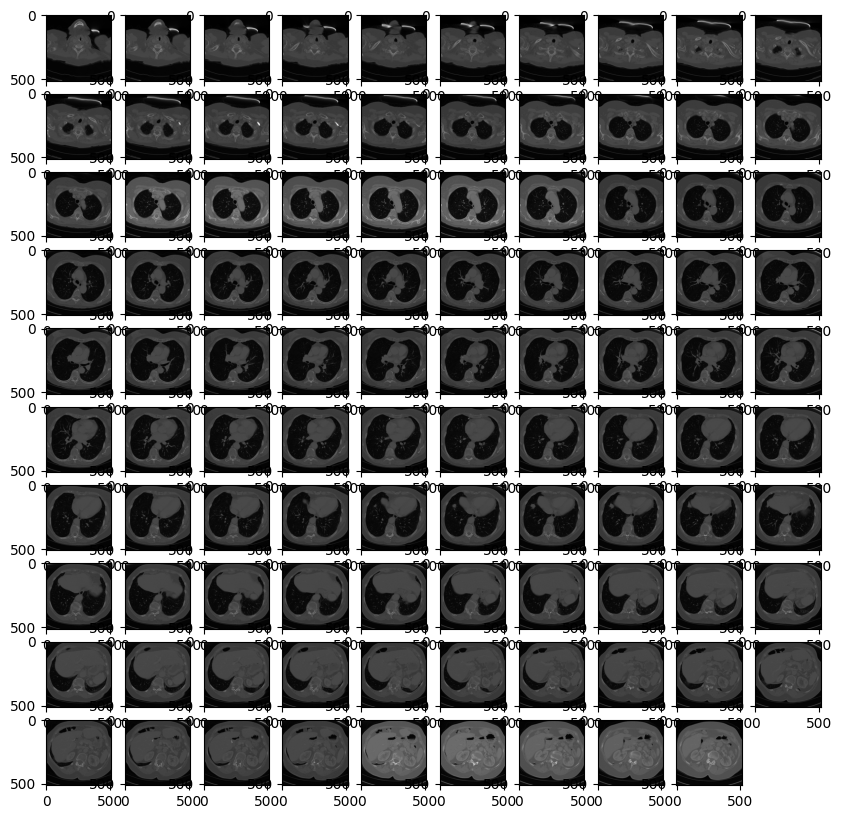

In [ ]:
import matplotlib.pyplot as plt

''' DICOM 슬라이스 시각화'''
# 슬라이스를 시각적으로 보여주기 위한 설정 (10x10 그리드)
fig = plt.figure(figsize=(10, 10))

# 99개의 슬라이스를 각각 그리드에 추가
for id in range(0, 99):
  fig.add_subplot(10, 10, id + 1)  # 10x10 그리드에 서브플롯 추가
  plt.imshow(vol_array[id], cmap='gray')  # 각 슬라이스를 그레이스케일로 표시

plt.show()  # 이미지 그리기


In [ ]:
import torch

'''numpy 배열을 PyTorch 텐서로 변환하고 차원 추가'''
# numpy 배열을 PyTorch 텐서로 변환하고 float 타입으로 변경
vol = torch.from_numpy(vol_array).float()

# 첫 번째 차원을 추가 (채널 차원 추가, 볼륨 데이터가 1개임을 나타냄)
vol = torch.unsqueeze(vol, 0)  # vol.shape -> (1, 99, 512, 512)

# 두 번째 차원을 추가 (데이터 크기 차원 추가)
vol = torch.unsqueeze(vol, 0)  # vol.shape -> (1, 1, 99, 512, 512)

# 결과 텐서의 크기 출력
print(vol.shape)  # >>> torch.Size([1, 1, 99, 512, 512])

print("#" * 50, 2)

torch.Size([1, 1, 99, 512, 512])
################################################## 2


In [ ]:
'''텐서 데이터의 평균과 표준편차 계산 및 정규화'''
# 각 슬라이스(99개)의 전체 픽셀에 대한 평균을 계산 (세로, 가로 방향 차원)
mean = torch.mean(vol, dim=(3, 4), keepdim=True)  # (3, 4) 차원을 따라 평균을 구함
print(mean.shape)  # >>> torch.Size([1, 1, 99, 1, 1]) (평균 값을 해당 차원에 유지)

# 각 슬라이스(99개)의 전체 픽셀에 대한 표준편차를 계산 (세로, 가로 방향 차원)
std = torch.std(vol, dim=(3, 4), keepdim=True)  # (3, 4) 차원을 따라 표준편차를 구함
print(std.shape)  # >>> torch.Size([1, 1, 99, 1, 1]) (표준편차 값을 해당 차원에 유지)

# 각 슬라이스에 대해 정규화 수행: (값 - 평균) / 표준편차
vol = (vol - mean) / std
print(vol.shape)  # >>> torch.Size([1, 1, 99, 512, 512])

# 첫 번째 슬라이스의 정규화된 값을 출력
print(vol[0, 0, 0])  # 첫 번째 슬라이스의 정규화된 데이터


torch.Size([1, 1, 99, 1, 1])
torch.Size([1, 1, 99, 1, 1])
torch.Size([1, 1, 99, 512, 512])
tensor([[-1.0002, -1.0102, -1.0283,  ..., -1.0645, -1.0464, -0.9720],
        [-1.0625, -0.9982, -0.9560,  ..., -1.0303, -1.0484, -1.0283],
        [-1.0785, -1.0464, -1.0223,  ..., -0.9881, -1.0725, -1.0042],
        ...,
        [-0.8696, -0.9138, -0.9178,  ..., -0.8153, -0.8636, -0.9399],
        [-0.7711, -0.7872, -0.8394,  ..., -0.8194, -0.7671, -0.7631],
        [-0.7812, -0.7390, -0.7752,  ..., -0.8957, -0.9941, -0.9017]])


# c_tabular_wine_data.ipynb

In [ ]:
import os
import numpy as np
import csv

'''CSV 파일에서 데이터를 읽고 numpy 배열로 변환'''
# winequality-white.csv 파일의 경로를 생성
wine_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "d_tabular-wine", "winequality-white.csv")

# numpy의 loadtxt를 사용해 CSV 데이터를 float32 형식으로 불러오기
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";", skiprows=1)

# 데이터 타입과 배열의 크기 출력
print(wineq_numpy.dtype)  # >>> float32
print(wineq_numpy.shape)  # >>> (4898, 12)  (4898개의 샘플과 12개의 컬럼)
print(wineq_numpy)  # 데이터 출력
print()

# CSV 파일의 첫 번째 줄에서 컬럼 이름을 읽어오기
col_list = next(csv.reader(open(wine_path), delimiter=';'))
print(col_list)  # >>> ['fixed acidity', 'volatile acidity', ..., 'quality'] (컬럼 이름 목록)
print()

print("#" * 50, 1)


float32
(4898, 12)
[[ 7.    0.27  0.36 ...  0.45  8.8   6.  ]
 [ 6.3   0.3   0.34 ...  0.49  9.5   6.  ]
 [ 8.1   0.28  0.4  ...  0.44 10.1   6.  ]
 ...
 [ 6.5   0.24  0.19 ...  0.46  9.4   6.  ]
 [ 5.5   0.29  0.3  ...  0.38 12.8   7.  ]
 [ 6.    0.21  0.38 ...  0.32 11.8   6.  ]]

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

################################################## 1


In [ ]:
import torch

''' numpy 배열을 PyTorch 텐서로 변환'''
# numpy 배열을 PyTorch 텐서로 변환
wineq = torch.from_numpy(wineq_numpy)
print(wineq.dtype)  # >>> torch.float32
print(wineq.shape)  # >>> torch.Size([4898, 12])
print()

# 데이터와 타겟을 분리
# 데이터는 마지막 열을 제외한 모든 열, 즉 입력 특징들
data = wineq[:, :-1]  # (4898, 11) 크기
print(data.dtype)  # >>> torch.float32
print(data.shape)  # >>> torch.Size([4898, 11])
print(data)  # 데이터 출력
print()

# 타겟은 마지막 열의 값들, 즉 와인의 품질
target = wineq[:, -1]  # (4898,) 크기
print(target.dtype)  # >>> torch.float32
print(target.shape)  # >>> torch.Size([4898])
print(target)  # 타겟 출력
print()

# 타겟을 정수형으로 변환 (품질 값은 정수이므로 long 타입으로 변환)
target = target.long()
print(target.dtype)  # >>> torch.int64
print(target.shape)  # >>> torch.Size([4898])
print(target)  # 정수형 타겟 출력
print()

print("#" * 50, 2)

torch.float32
torch.Size([4898, 12])

torch.float32
torch.Size([4898, 11])
tensor([[ 7.0000,  0.2700,  0.3600,  ...,  3.0000,  0.4500,  8.8000],
        [ 6.3000,  0.3000,  0.3400,  ...,  3.3000,  0.4900,  9.5000],
        [ 8.1000,  0.2800,  0.4000,  ...,  3.2600,  0.4400, 10.1000],
        ...,
        [ 6.5000,  0.2400,  0.1900,  ...,  2.9900,  0.4600,  9.4000],
        [ 5.5000,  0.2900,  0.3000,  ...,  3.3400,  0.3800, 12.8000],
        [ 6.0000,  0.2100,  0.3800,  ...,  3.2600,  0.3200, 11.8000]])

torch.float32
torch.Size([4898])
tensor([6., 6., 6.,  ..., 6., 7., 6.])

torch.int64
torch.Size([4898])
tensor([6, 6, 6,  ..., 6, 7, 6])

################################################## 2


In [ ]:
''' 타겟 데이터를 원-핫 인코딩'''
# 10x10 단위 행렬 생성 (0~9까지의 값을 원-핫 인코딩할 수 있음)
eye_matrix = torch.eye(10)

# 타겟 텐서를 인덱스로 사용해 타겟에 대응하는 원-핫 벡터를 생성
onehot_target = eye_matrix[target]

print(onehot_target.shape)  # >>> torch.Size([4898, 10])
print(onehot_target[0])  # 첫 번째 타겟에 대한 원-핫 벡터
print(onehot_target[1])  # 두 번째 타겟에 대한 원-핫 벡터
print(onehot_target[-2])  # 끝에서 두 번째 타겟에 대한 원-핫 벡터
print(onehot_target)  # 전체 원-핫 인코딩된 타겟 출력

print("#" * 50, 3)

torch.Size([4898, 10])
tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
################################################## 3


In [ ]:
''' 데이터 정규화'''
# 각 특징(컬럼)에 대해 평균과 분산을 계산하여 정규화 수행
data_mean = torch.mean(data, dim=0)  # 각 특징별 평균 계산
data_var = torch.var(data, dim=0)  # 각 특징별 분산 계산
data = (data - data_mean) / torch.sqrt(data_var)  # 정규화: (값 - 평균) / 표준편차
print(data)  # 정규화된 데이터 출력

print("#" * 50, 4)

tensor([[ 1.7208e-01, -8.1761e-02,  2.1326e-01,  ..., -1.2468e+00,
         -3.4915e-01, -1.3930e+00],
        [-6.5743e-01,  2.1587e-01,  4.7996e-02,  ...,  7.3995e-01,
          1.3422e-03, -8.2419e-01],
        [ 1.4756e+00,  1.7450e-02,  5.4378e-01,  ...,  4.7505e-01,
         -4.3677e-01, -3.3663e-01],
        ...,
        [-4.2043e-01, -3.7940e-01, -1.1915e+00,  ..., -1.3130e+00,
         -2.6153e-01, -9.0545e-01],
        [-1.6054e+00,  1.1666e-01, -2.8253e-01,  ...,  1.0049e+00,
         -9.6251e-01,  1.8574e+00],
        [-1.0129e+00, -6.7703e-01,  3.7852e-01,  ...,  4.7505e-01,
         -1.4882e+00,  1.0448e+00]])
################################################## 4


In [ ]:
from sklearn.model_selection import train_test_split

''' 학습 데이터와 테스트 데이터를 나누기'''
# train_test_split을 사용해 학습 데이터와 테스트 데이터로 나눔 (8:2 비율)
X_train, X_test, y_train, y_test = train_test_split(data, onehot_target, test_size=0.2)

# 학습 데이터와 타겟의 크기 출력
print(X_train.shape)  # >>> torch.Size([3918, 11])
print(y_train.shape)  # >>> torch.Size([3918, 10])

# 테스트 데이터와 타겟의 크기 출력
print(X_test.shape)  # >>> torch.Size([980, 11])
print(y_test.shape)  # >>> torch.Size([980, 10])

torch.Size([3918, 11])
torch.Size([3918, 10])
torch.Size([980, 11])
torch.Size([980, 10])


In [ ]:
''' 데이터 로더 함수 정의 '''
# 학습 데이터를 로드하기 위한 함수 정의
def get_wine_data():
  wine_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "d_tabular-wine", "winequality-white.csv")

  # numpy 배열로 데이터 읽기
  wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";", skiprows=1)

  # numpy 배열을 PyTorch 텐서로 변환
  wineq = torch.from_numpy(wineq_numpy)

  # 데이터와 타겟을 분리
  data = wineq[:, :-1]  # 입력 데이터
  target = wineq[:, -1].long()  # 정수형 타겟 데이터

  # 타겟 데이터를 원-핫 인코딩
  eye_matrix = torch.eye(10)
  onehot_target = eye_matrix[target]

  # 데이터 정규화
  data_mean = torch.mean(data, dim=0)
  data_var = torch.var(data, dim=0)
  data = (data - data_mean) / torch.sqrt(data_var)

  # 학습 데이터와 검증 데이터로 나누기
  X_train, X_valid, y_train, y_valid = train_test_split(data, onehot_target, test_size=0.2)

  return X_train, X_valid, y_train, y_valid

# d_tabular_california_housing.ipynb

In [ ]:
# https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset
import torch
from sklearn.datasets import fetch_california_housing

'''캘리포니아 주택 가격 데이터셋 불러오기'''
# sklearn의 fetch_california_housing()을 이용해 캘리포니아 주택 데이터셋 로드
housing = fetch_california_housing()

# 데이터셋의 키 출력 (데이터, 타겟, 특성 이름 등 여러 정보 포함)
print(housing.keys())  # >>> dict_keys(['data', 'target', 'feature_names', 'DESCR', ...])

# 데이터의 타입, dtype, 크기 출력
print(type(housing.data))  # >>> <class 'numpy.ndarray'>
print(housing.data.dtype)  # >>> float64
print(housing.data.shape)  # >>> (20640, 8)  (20640개의 샘플과 8개의 특징)
print(housing.feature_names)  # >>> ['MedInc', 'HouseAge', 'AveRooms', ...]

# 타겟 데이터의 크기와 타겟 이름 출력
print(housing.target.shape)  # >>> (20640,)
print(housing.target_names)  # >>> ['MedHouseVal']  (타겟은 주택 가격)

print("#" * 50, 1)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
<class 'numpy.ndarray'>
float64
(20640, 8)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
(20640,)
['MedHouseVal']
################################################## 1


In [ ]:
import numpy as np

'''데이터 정규화 전의 최소값과 최대값 계산'''
# 각 특징의 최소값과 최대값 출력 (정규화 전)
print(housing.data.min(), housing.data.max())  # >>> 0.4999 14166.0 (예시)

# 각 특징의 평균과 분산을 계산하여 정규화 수행
data_mean = np.mean(housing.data, axis=0)  # 각 열(특징)의 평균 계산
data_var = np.var(housing.data, axis=0)  # 각 열(특징)의 분산 계산

# 데이터를 평균과 표준편차로 정규화: (데이터 - 평균) / 표준편차
data = (housing.data - data_mean) / np.sqrt(data_var)
target = housing.target  # 타겟 데이터는 그대로 유지 (정규화하지 않음)

# 정규화 후 데이터의 최소값과 최대값 출력
print(data.min(), data.max())  # >>> 정규화된 데이터의 범위

print("#" * 50, 2)

-124.35 35682.0
-2.3859923416733877 119.41910318829312
################################################## 2


In [ ]:
from sklearn.model_selection import train_test_split

'''학습 데이터와 테스트 데이터로 분할'''
# 데이터를 80% 학습용, 20% 테스트용으로 분할
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

# numpy 배열을 PyTorch 텐서로 변환
X_train = torch.from_numpy(X_train)  # 학습 데이터를 텐서로 변환
X_test = torch.from_numpy(X_test)  # 테스트 데이터를 텐서로 변환
y_train = torch.from_numpy(y_train)  # 학습 타겟을 텐서로 변환
y_test = torch.from_numpy(y_test)  # 테스트 타겟을 텐서로 변환

# 학습 데이터와 타겟의 크기 출력
print(X_train.shape)  # >>> torch.Size([16512, 8])  (16512개의 샘플과 8개의 특징)
print(y_train.shape)  # >>> torch.Size([16512])

# 테스트 데이터와 타겟의 크기 출력
print(X_test.shape)  # >>> torch.Size([4128, 8])
print(y_test.shape)  # >>> torch.Size([4128])

torch.Size([16512, 8])
torch.Size([16512])
torch.Size([4128, 8])
torch.Size([4128])


# e_bikes_sharing_data.ipynb

In [ ]:
import numpy as np
import torch
import os

''' CSV 데이터를 numpy 배열로 읽고 PyTorch 텐서로 변환'''
# PyTorch 텐서 출력 형식 설정 (edgeitems: 출력되는 항목 수, threshold: 출력될 항목의 최대 수, linewidth: 출력 라인 너비)
torch.set_printoptions(edgeitems=2, threshold=50, linewidth=75)

# 파일 경로 설정
bikes_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "e_time-series-bike-sharing-dataset", "hour-fixed.csv")

# numpy의 loadtxt를 사용해 CSV 데이터를 읽어오기
# 1번째 열의 값을 변환 (YYYY-MM-DD 형식에서 일(day) 정보만 추출하여 float으로 변환)
bikes_numpy = np.loadtxt(
  fname=bikes_path, dtype=np.float32, delimiter=",", skiprows=1,
  converters={
    1: lambda x: float(x[8:10])  # 날짜에서 일(day) 정보만 추출
  }
)

# numpy 배열을 PyTorch 텐서로 변환
bikes = torch.from_numpy(bikes_numpy)
print(bikes.shape)  # >>> torch.Size([17520, 17]) (17520시간 동안의 17개의 정보)

# 데이터를 24시간 단위로 reshape (일 단위로 변환)
daily_bikes = bikes.view(-1, 24, bikes.shape[1])
print(daily_bikes.shape)  # >>> torch.Size([730, 24, 17]) (730일 동안, 24시간 데이터, 17개의 정보)

# 마지막 컬럼(타겟)을 제외한 데이터를 'daily_bikes_data'에 저장
daily_bikes_data = daily_bikes[:, :, :-1]  # 타겟 데이터 제외한 모든 정보
# 마지막 컬럼(타겟)을 따로 'daily_bikes_target'에 저장하고, 차원을 하나 추가
daily_bikes_target = daily_bikes[:, :, -1].unsqueeze(dim=-1)  # 타겟 데이터 (차원 추가)

print(daily_bikes_data.shape)  # >>> torch.Size([730, 24, 16]) (16개의 특징)
print(daily_bikes_target.shape)  # >>> torch.Size([730, 24, 1]) (1개의 타겟)

print("#" * 50, 1)


torch.Size([17520, 17])
torch.Size([730, 24, 17])
torch.Size([730, 24, 16])
torch.Size([730, 24, 1])
################################################## 1


In [ ]:
'''첫 번째 날의 데이터와 날씨 정보 인코딩 (원-핫 벡터로 변환)'''
# 첫 번째 날의 데이터 (24시간)
first_day_data = daily_bikes_data[0]
print(first_day_data.shape)  # >>> torch.Size([24, 16])

# 날씨 상태 (1: 맑음, 2: 안개, 3: 약한 비/눈, 4: 강한 비/눈) 출력
print(first_day_data[:, 9].long())  # 날씨 상태(정수형) 출력

# 원-핫 벡터 생성: 4x4 단위 행렬 (각 날씨 상태에 대해 1-핫 인코딩 가능)
eye_matrix = torch.eye(4)
print(eye_matrix)

# 날씨 상태를 1-핫 벡터로 변환
weather_onehot = eye_matrix[first_day_data[:, 9].long() - 1]  # 1-핫 인코딩
print(weather_onehot.shape)  # >>> torch.Size([24, 4]) (24시간 동안의 날씨 상태를 1-핫 벡터로 변환)
print(weather_onehot)

# 원본 데이터에 1-핫 벡터를 결합하여 최종 데이터 생성
first_day_data_torch = torch.cat(tensors=(first_day_data, weather_onehot), dim=1)
print(first_day_data_torch.shape)  # >>> torch.Size([24, 20]) (4개의 1-핫 벡터가 추가되어 20개의 정보)
print(first_day_data_torch)

print("#" * 50, 2)

torch.Size([24, 16])
tensor([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2,
        2, 2])
tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])
torch.Size([24, 4])
tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]])
torch.Size([24, 20])
tensor([[ 1.,  1.,  ...,  0.,  0.],
        [ 2.,  1.,  ...,  0.,  0.],
        ...,
        [23.,  1.,  ...,  0.,  0.],
        [24.,  1.,  ...,  0.,  0.]])
################################################## 2


In [ ]:
''' 전체 일간 데이터에 대해 날씨 상태 인코딩 및 결합'''
day_data_torch_list = []

# 모든 날(730일)에 대해 반복
for daily_idx in range(daily_bikes_data.shape[0]):  # range(730)
  day = daily_bikes_data[daily_idx]  # 하루 데이터 (24시간)

  # 날씨 상태를 1-핫 벡터로 변환
  weather_onehot = eye_matrix[day[:, 9].long() - 1]

  # 원본 데이터와 1-핫 벡터를 결합하여 최종 데이터 생성
  day_data_torch = torch.cat(tensors=(day, weather_onehot), dim=1)  # 결과 크기: [24, 20]

  # 리스트에 추가
  day_data_torch_list.append(day_data_torch)

# 리스트를 다시 텐서로 변환
daily_bikes_data = torch.stack(day_data_torch_list, dim=0)  # 크기: [730, 24, 20]
print(len(day_data_torch_list))  # >>> 730 (730일 동안의 데이터)
print(daily_bikes_data.shape)  # >>> torch.Size([730, 24, 20]) (각 날에 20개의 특징이 있음)

print("#" * 50, 3)


730
torch.Size([730, 24, 20])
################################################## 3


In [ ]:
'''필요 없는 열 제거 및 데이터 정규화'''
# 첫 번째와 10번째 열을 제거 ('instant'와 'weathersit' 열을 제외)
print(daily_bikes_data[:, :, :9].shape, daily_bikes_data[:, :, 10:].shape)  # 각 부분의 크기 확인
daily_bikes_data = torch.cat(
  [daily_bikes_data[:, :, 1:9], daily_bikes_data[:, :, 10:]], dim=2  # 열 결합
)  # 'instant'와 'weathersit' 열 제거, 최종 데이터 생성
print(daily_bikes_data.shape)  # >>> torch.Size([730, 24, 18]) (최종 18개의 특징)

# 온도 데이터 추출 및 정규화
temperatures = daily_bikes_data[:, :, 8]  # 8번째 열이 온도 정보
daily_bikes_data[:, :, 8] = (daily_bikes_data[:, :, 8] - torch.mean(temperatures)) / torch.std(temperatures)
# 온도를 평균 0, 표준편차 1로 정규화


torch.Size([730, 24, 9]) torch.Size([730, 24, 10])
torch.Size([730, 24, 18])


# f_hourly_bikes_sharing_data.ipynb

In [ ]:
import numpy as np
import torch
from pathlib import Path
import os

''' 경로 설정 및 CSV 데이터를 numpy 배열로 읽기'''
# BASE_PATH는 현재 파일의 부모 디렉토리 3단계를 거쳐 계산
BASE_PATH = "/Users/yscho/git/link_dl" # str(Path(__file__).resolve().parent.parent.parent)  # 예시: /Users/yhhan/git/link_dl
#코드 오류로 직접적 경로 명시함.

# 파이썬 시스템 경로에 BASE_PATH 추가 (필요한 모듈을 찾기 위한 설정)
import sys
sys.path.append(BASE_PATH)

# PyTorch 텐서 출력 설정 (출력의 크기와 라인 너비를 제한)
torch.set_printoptions(edgeitems=2, threshold=50, linewidth=75)

# CSV 파일 경로 설정
bikes_path = os.path.join(BASE_PATH, "_00_data", "e_time-series-bike-sharing-dataset", "hour-fixed.csv")

# CSV 파일을 numpy 배열로 읽기, 첫 번째 열은 일(day) 정보만 추출해서 float으로 변환
bikes_numpy = np.loadtxt(
    fname=bikes_path, dtype=np.float32, delimiter=",", skiprows=1,
    converters={1: lambda x: float(x[8:10])}  # 날짜에서 일(day)만 추출 (2011-01-07 -> 07 -> 7.0)
)

# numpy 배열을 PyTorch 텐서로 변환
bikes_data = torch.from_numpy(bikes_numpy).to(torch.float)
print(bikes_data.shape)  # >>> torch.Size([17520, 17]) (17520시간의 데이터, 17개 정보)

# 마지막 열(타겟)을 분리하고 나머지 데이터는 bikes_data로 저장
bikes_target = bikes_data[:, -1].unsqueeze(dim=-1)  # 'cnt' 열 (타겟 데이터)
bikes_data = bikes_data[:, :-1]  # 마지막 열 제외한 모든 데이터 (16개 특징)

# 4x4 단위 행렬 생성 (날씨 상태를 원-핫 벡터로 인코딩하기 위한 준비)
eye_matrix = torch.eye(4)


torch.Size([17520, 17])


In [ ]:
'''각 시간 데이터에 대해 날씨 정보를 원-핫 인코딩하고 데이터에 결합'''
data_torch_list = []
for idx in range(bikes_data.shape[0]):
    hour_data = bikes_data[idx]  # 1시간 동안의 데이터 (shape: [16])
    # 날씨 상태(9번째 특징)를 원-핫 벡터로 변환
    weather_onehot = eye_matrix[hour_data[9].long() - 1]
    # 원본 데이터와 원-핫 벡터를 결합하여 최종 데이터 생성
    concat_data_torch = torch.cat(tensors=(hour_data, weather_onehot), dim=-1)
    # 결과 텐서 크기: [20] (4개의 원-핫 벡터 추가)
    data_torch_list.append(concat_data_torch)

# 각 시간 데이터를 결합하여 최종 텐서 생성 (shape: [17520, 20])
bikes_data = torch.stack(data_torch_list, dim=0)

# 'instant'와 'weathersit' 열을 제거 (필요 없는 열 제거)
bikes_data = torch.cat([bikes_data[:, 1:9], bikes_data[:, 10:]], dim=-1)
print(bikes_data.shape)  # >>> torch.Size([17520, 18]) (18개의 특징으로 축소)
print(bikes_data[0])  # 첫 번째 시간 데이터 출력

'''시퀀스 크기 및 학습, 검증, 테스트 데이터 크기 설정'''
sequence_size = 24  # 24시간(하루)을 하나의 시퀀스로 설정
validation_size = 96  # 검증 데이터 크기
test_size = 24  # 테스트 데이터 크기
y_normalizer = 100  # 타겟 값 정규화 비율

# 전체 데이터 크기 계산 (데이터 길이에서 시퀀스 크기를 뺀 값)
data_size = len(bikes_data) - sequence_size + 1
print("data_size: {0}".format(data_size))

# 학습 데이터 크기 계산 (전체 데이터에서 검증, 테스트 데이터 제외)
train_size = data_size - (validation_size + test_size)
print(f"train_size: {train_size}, validation_size: {validation_size}, test_size: {test_size}")

print("#" * 50, 1)


torch.Size([17520, 18])
tensor([ 1.0000,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  6.0000,
         0.0000,  0.2400,  0.2879,  0.8100,  0.0000,  3.0000, 13.0000,
         1.0000,  0.0000,  0.0000,  0.0000])
data_size: 17497
train_size: 17377, validation_size: 96, test_size: 24
################################################## 1


In [ ]:
'''학습 데이터 생성'''
row_cursor = 0  # 시작 인덱스

X_train_list = []  # 학습용 입력 시퀀스 저장 리스트
y_train_regression_list = []  # 학습용 타겟 저장 리스트

# 학습 데이터 생성 (시퀀스 크기만큼의 데이터를 잘라서 입력으로 사용)
for idx in range(0, train_size):
    sequence_data = bikes_data[idx: idx + sequence_size]  # 시퀀스 데이터 (24시간)
    sequence_target = bikes_target[idx + sequence_size - 1]  # 시퀀스 마지막 타겟 값
    X_train_list.append(sequence_data)
    y_train_regression_list.append(sequence_target)
    row_cursor += 1  # 다음 인덱스로 이동

# 리스트를 텐서로 변환
X_train = torch.stack(X_train_list, dim=0).to(torch.float)
y_train_regression = torch.tensor(y_train_regression_list, dtype=torch.float32) / y_normalizer  # 타겟 정규화

# 학습 데이터 정규화 (평균 0, 표준편차 1)
m = X_train.mean(dim=0, keepdim=True)
s = X_train.std(dim=0, keepdim=True)
X_train = (X_train - m) / s

print(X_train.shape, y_train_regression.shape)  # >>> torch.Size([17376, 24, 19]) torch.Size([17376])

print("#" * 50, 2)


torch.Size([17377, 24, 18]) torch.Size([17377])
################################################## 2


In [ ]:
'''검증 데이터 생성'''
X_validation_list = []
y_validation_regression_list = []

# 검증 데이터 생성 (학습 데이터와 같은 방식으로 생성)
for idx in range(row_cursor, row_cursor + validation_size):
    sequence_data = bikes_data[idx: idx + sequence_size]  # 검증용 시퀀스 데이터
    sequence_target = bikes_target[idx + sequence_size - 1]  # 검증용 타겟 데이터
    X_validation_list.append(sequence_data)
    y_validation_regression_list.append(sequence_target)
    row_cursor += 1

# 리스트를 텐서로 변환
X_validation = torch.stack(X_validation_list, dim=0).to(torch.float)
y_validation_regression = torch.tensor(y_validation_regression_list, dtype=torch.float32) / y_normalizer

# 검증 데이터 정규화 (학습 데이터 정규화 기준에 맞춤)
X_validation = (X_validation - m) / s

print(X_validation.shape, y_validation_regression.shape)  # >>> torch.Size([96, 24, 19]) torch.Size([96])

print("#" * 50, 3)

torch.Size([96, 24, 18]) torch.Size([96])
################################################## 3


In [ ]:
'''테스트 데이터 생성'''
X_test_list = []
y_test_regression_list = []

# 테스트 데이터 생성 (학습 및 검증 데이터와 같은 방식으로 생성)
for idx in range(row_cursor, row_cursor + test_size):
    sequence_data = bikes_data[idx: idx + sequence_size]  # 테스트용 시퀀스 데이터
    sequence_target = bikes_target[idx + sequence_size - 1]  # 테스트용 타겟 데이터
    X_test_list.append(sequence_data)
    y_test_regression_list.append(sequence_target)
    row_cursor += 1

# 리스트를 텐서로 변환
X_test = torch.stack(X_test_list, dim=0).to(torch.float)
y_test_regression = torch.tensor(y_test_regression_list, dtype=torch.float32) / y_normalizer

# 테스트 데이터 정규화 (학습 데이터 정규화 기준에 맞춤)
X_test = (X_test - m) / s

print(X_test.shape, y_test_regression.shape)  # >>> torch.Size([24, 24, 18]) torch.Size([24])


torch.Size([24, 24, 18]) torch.Size([24])


# g_cryptocurrency_data.ipynb

In [ ]:
import pandas as pd
from pathlib import Path
import os
import torch
import matplotlib.pyplot as plt

''' 경로 설정 및 CSV 파일 읽기'''
# BASE_PATH는 현재 파일의 부모 디렉토리 경로를 설정
# Jupyter Notebook에서는 __file__ 지원 안 하므로 역시 경로 명시적 작성
BASE_PATH = "/Users/yscho/git/link_dl" # str(Path(__file__).resolve().parent.parent.parent)  # 예: /Users/yhhan/git/link_dl

# 시스템 경로에 BASE_PATH를 추가하여 해당 경로의 모듈을 참조할 수 있도록 설정
import sys
sys.path.append(BASE_PATH)

# 비트코인-원화 데이터가 있는 파일 경로 설정
btc_krw_path = os.path.join(BASE_PATH, "_00_data", "k_cryptocurrency", "BTC_KRW.csv")

# CSV 파일을 pandas의 DataFrame으로 읽어오기
df = pd.read_csv(btc_krw_path)
print(df)

# 데이터 크기 출력 (행의 수)
row_size = len(df)
print("row_size:", row_size)

# DataFrame의 컬럼 이름 확인
columns = df.columns  # 예: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
print([column for column in columns])

# 'Date' 컬럼을 따로 저장하고, 'Date' 컬럼을 제거한 나머지 데이터를 df에 저장
date_list = df['Date']
df = df.drop(columns=['Date'])

print(df)  # 'Date'를 제외한 데이터 출력
print("#" * 100, 0)

            Date          Open          High           Low         Close  \
0      2014.9.17  4.826118e+05  4.838110e+05  4.681210e+05  4.732035e+05   
1      2014.9.18  4.727130e+05  4.762765e+05  4.309914e+05  4.428182e+05   
2      2014.9.19  4.424667e+05  4.475154e+05  4.012784e+05  4.119893e+05   
3      2014.9.20  4.118610e+05  4.417305e+05  4.068624e+05  4.267118e+05   
4      2014.9.21  4.258571e+05  4.303872e+05  4.103040e+05  4.161897e+05   
...          ...           ...           ...           ...           ...   
3327  2023.10.27  4.668672e+07  4.730157e+07  4.585433e+07  4.615730e+07   
3328  2023.10.28  4.615710e+07  4.641771e+07  4.534866e+07  4.598915e+07   
3329  2023.10.29  4.598633e+07  4.665314e+07  4.594169e+07  4.623296e+07   
3330  2023.10.30  4.623269e+07  4.711951e+07  4.604037e+07  4.684124e+07   
3331  2023.10.31  4.683210e+07  4.699302e+07  4.603332e+07  4.645787e+07   

            Volume  
0     2.178747e+10  
1     3.597632e+10  
2     3.957110e+10  
3  

In [ ]:
#################################################################################################

''' 시퀀스 크기 및 학습, 검증, 테스트 데이터 크기 설정'''
sequence_size = 10  # 시퀀스 크기: 10개의 연속된 데이터를 하나의 입력으로 사용
validation_size = 100  # 검증 데이터 크기
test_size = 50  # 테스트 데이터 크기

# 전체 데이터 크기 계산
data_size = row_size - sequence_size + 1
print(f"data_size: {data_size}")

# 학습 데이터 크기 계산 (전체 데이터에서 검증과 테스트 데이터를 제외한 나머지)
train_size = data_size - (validation_size + test_size)
print(f"train_size: {train_size}, validation_size: {validation_size}, test_size: {test_size}")

print("#" * 100, 1)

data_size: 3323
train_size: 3173, validation_size: 100, test_size: 50
#################################################################################################### 1


In [ ]:
#################################################################################################

'''학습 데이터 생성'''
row_cursor = 0  # 현재 위치를 나타내는 인덱스
y_normalizer = 1.0e7  # 타겟 값을 정규화하기 위한 값 (10^7)

X_train_list = []  # 학습 데이터 저장 리스트
y_train_regression_list = []  # 학습 타겟(회귀) 저장 리스트
y_train_classification_list = []  # 학습 타겟(분류) 저장 리스트
y_train_date = []  # 학습 데이터 날짜 저장 리스트

# 학습 데이터 생성 (train_size 만큼 반복)
for idx in range(0, train_size):
    sequence_data = df.iloc[idx: idx + sequence_size].values  # 시퀀스 데이터 (shape: (sequence_size, 5))
    X_train_list.append(torch.from_numpy(sequence_data))  # 시퀀스 데이터를 텐서로 변환하여 저장

    # 회귀 타겟: 시퀀스 마지막 날의 'Close' 값
    y_train_regression_list.append(df.iloc[idx + sequence_size - 1]["Close"])

    # 분류 타겟: 마지막 'Close'가 이전 'Close'보다 크면 1, 아니면 0
    y_train_classification_list.append(
        1 if df.iloc[idx + sequence_size - 1]["Close"] >= df.iloc[idx + sequence_size - 2]["Close"] else 0
    )

    # 날짜 저장
    y_train_date.append(date_list[idx + sequence_size - 1])
    row_cursor += 1  # 다음 인덱스로 이동

# 학습 데이터를 텐서로 변환
X_train = torch.stack(X_train_list, dim=0).to(torch.float)
y_train_regression = torch.tensor(y_train_regression_list, dtype=torch.float32) / y_normalizer  # 회귀 타겟 정규화
y_train_classification = torch.tensor(y_train_classification_list, dtype=torch.int64)  # 분류 타겟 정수형으로 변환

# 학습 데이터 정규화 (평균 0, 표준편차 1로 변환)
m = X_train.mean(dim=0, keepdim=True)
s = X_train.std(dim=0, keepdim=True)
X_train -= m
X_train /= s

print(X_train.shape, y_train_regression.shape, y_train_classification.shape)
# 학습 데이터와 타겟의 크기 출력
print(f"Label - Start Date: {y_train_date[0]} ~ End Date: {y_train_date[-1]}")

print("#" * 100, 2)

torch.Size([3173, 10, 5]) torch.Size([3173]) torch.Size([3173])
Label - Start Date: 2014.9.26 ~ End Date: 2023.6.3
#################################################################################################### 2


In [ ]:
#################################################################################################

'''검증 데이터 생성'''
X_validation_list = []
y_validation_regression_list = []
y_validation_classification_list = []
y_validation_date = []

# 검증 데이터 생성 (validation_size 만큼 반복)
for idx in range(row_cursor, row_cursor + validation_size):
    sequence_data = df.iloc[idx: idx + sequence_size].values  # 시퀀스 데이터
    X_validation_list.append(torch.from_numpy(sequence_data))  # 시퀀스 데이터를 텐서로 변환하여 저장

    # 검증용 회귀 타겟과 분류 타겟
    y_validation_regression_list.append(df.iloc[idx + sequence_size - 1]["Close"])
    y_validation_classification_list.append(
        1 if df.iloc[idx + sequence_size - 1]["Close"] >= df.iloc[idx + sequence_size - 2]["Close"] else 0
    )

    # 검증용 날짜 저장
    y_validation_date.append(date_list[idx + sequence_size - 1])
    row_cursor += 1  # 다음 인덱스로 이동

# 검증 데이터를 텐서로 변환
X_validation = torch.stack(X_validation_list, dim=0).to(torch.float)
y_validation_regression = torch.tensor(y_validation_regression_list, dtype=torch.float32) / y_normalizer
y_validation_classification = torch.tensor(y_validation_classification_list, dtype=torch.int64)

# 검증 데이터 정규화 (학습 데이터 기준으로 정규화)
X_validation = (X_validation - m) / s

print(X_validation.shape, y_validation_regression.shape, y_validation_classification.shape)
# 검증 데이터와 타겟의 크기 출력
print(f"Label - Start Date: {y_validation_date[0]} ~ End Date: {y_validation_date[-1]}")

print("#" * 100, 3)

torch.Size([100, 10, 5]) torch.Size([100]) torch.Size([100])
Label - Start Date: 2023.6.4 ~ End Date: 2023.9.11
#################################################################################################### 3


In [ ]:
#################################################################################################

''' 테스트 데이터 생성'''
X_test_list = []
y_test_regression_list = []
y_test_classification_list = []
y_test_date = []

# 테스트 데이터 생성 (test_size 만큼 반복)
for idx in range(row_cursor, row_cursor + test_size):
    sequence_data = df.iloc[idx: idx + sequence_size].values  # 시퀀스 데이터
    X_test_list.append(torch.from_numpy(sequence_data))  # 시퀀스 데이터를 텐서로 변환하여 저장

    # 테스트용 회귀 타겟과 분류 타겟
    y_test_regression_list.append(df.iloc[idx + sequence_size - 1]["Close"])
    y_test_classification_list.append(
        1 if df.iloc[idx + sequence_size - 1]["Close"] > df.iloc[idx + sequence_size - 2]["Close"] else 0
    )

    # 테스트용 날짜 저장
    y_test_date.append(date_list[idx + sequence_size - 1])
    row_cursor += 1  # 다음 인덱스로 이동

# 테스트 데이터를 텐서로 변환
X_test = torch.stack(X_test_list, dim=0).to(torch.float)
y_test_regression = torch.tensor(y_test_regression_list, dtype=torch.float32) / y_normalizer
y_test_classification = torch.tensor(y_test_classification_list, dtype=torch.int64)

# 테스트 데이터 정규화 (학습 데이터 기준으로 정규화)
X_test = (X_test - m) / s

print(X_test.shape, y_test_regression.shape, y_test_classification.shape)
# 테스트 데이터와 타겟의 크기 출력
print(f"Label - Start Date: {y_test_date[0]} ~ End Date: {y_test_date[-1]}")


torch.Size([50, 10, 5]) torch.Size([50]) torch.Size([50])
Label - Start Date: 2023.9.12 ~ End Date: 2023.10.31


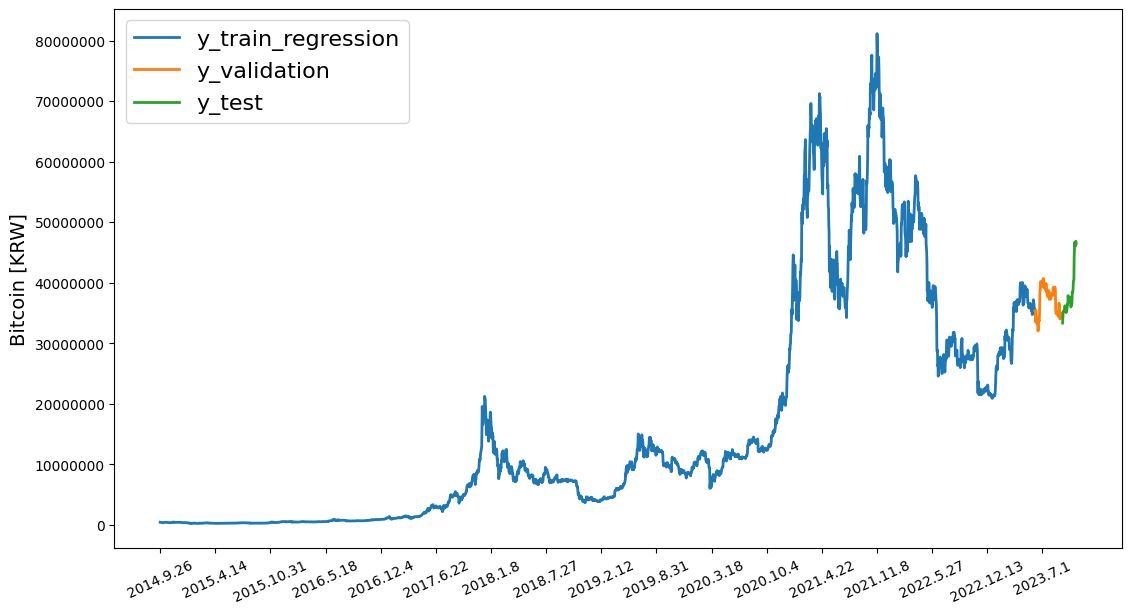

In [ ]:
#######################################################################################

'''학습, 검증, 테스트 데이터 시각화'''
fig, ax = plt.subplots(1, figsize=(13, 7))

# 학습, 검증, 테스트 데이터의 회귀 타겟 값 시각화
ax.plot(y_train_date, y_train_regression * y_normalizer, label="y_train_regression", linewidth=2)
ax.plot(y_validation_date, y_validation_regression * y_normalizer, label="y_validation", linewidth=2)
ax.plot(y_test_date, y_test_regression * y_normalizer, label="y_test", linewidth=2)

# Y축 레이블 설정 및 X축에 날짜 표시 설정
ax.set_ylabel('Bitcoin [KRW]', fontsize=14)
ax.set_xticks(ax.get_xticks()[::200])  # X축 간격을 조정
plt.ticklabel_format(style='plain', axis='y')  # Y축의 숫자 형식을 평범한 형식으로 설정
plt.xticks(rotation=25)  # X축 레이블을 25도 회전
ax.legend(loc='upper left', fontsize=16)  # 범례 위치와 폰트 크기 설정
plt.show()  # 그래프 출력


# h_audio_data.ipynb

In [ ]:
import os
import scipy.io.wavfile as wavfile
import torch

''' 오디오 파일 읽기'''
# 오디오 파일 경로 설정
audio_1_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "f_audio-chirp", "1-100038-A-14.wav")
audio_2_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "f_audio-chirp", "1-100210-A-36.wav")

# scipy의 wavfile.read를 사용하여 첫 번째 오디오 파일을 읽기
freq_1, waveform_arr_1 = wavfile.read(audio_1_path)  # freq_1: 샘플링 주파수, waveform_arr_1: 오디오 데이터 배열
print(freq_1)  # 샘플링 주파수 출력
print(type(waveform_arr_1))  # 오디오 데이터 타입 출력 (numpy 배열)
print(len(waveform_arr_1))  # 오디오 데이터 길이 출력
print(waveform_arr_1)  # 실제 오디오 데이터 출력 (numpy 배열)

# 두 번째 오디오 파일 읽기
freq_2, waveform_arr_2 = wavfile.read(audio_2_path)  # 두 번째 오디오 데이터와 샘플링 주파수

# 텐서를 사용해 두 개의 오디오 데이터를 결합
waveform = torch.empty(2, 1, 220_500)  # 두 개의 오디오 샘플을 저장할 빈 텐서 생성 (220,500개의 샘플)
waveform[0, 0] = torch.from_numpy(waveform_arr_1).float()  # 첫 번째 오디오 데이터를 텐서로 변환하여 저장
waveform[1, 0] = torch.from_numpy(waveform_arr_2).float()  # 두 번째 오디오 데이터를 텐서로 변환하여 저장
print(waveform.shape)  # >>> torch.Size([2, 1, 220500]) (2개의 오디오, 1개의 채널, 220,500개의 샘플)

print("#" * 50, 1)

44100
<class 'numpy.ndarray'>
220500
[ -388 -3387 -4634 ...  2289  1327    90]
torch.Size([2, 1, 220500])
################################################## 1


In [ ]:
from scipy import signal

''' 스펙트로그램 생성'''
# signal.spectrogram을 사용하여 스펙트로그램 계산 (파형 데이터를 시간-주파수 도메인으로 변환)
_, _, sp_arr_1 = signal.spectrogram(waveform_arr_1, freq_1)  # 첫 번째 오디오 파일의 스펙트로그램 계산
_, _, sp_arr_2 = signal.spectrogram(waveform_arr_2, freq_2)  # 두 번째 오디오 파일의 스펙트로그램 계산

# 스펙트로그램을 numpy 배열에서 PyTorch 텐서로 변환
sp_1 = torch.from_numpy(sp_arr_1)  # 첫 번째 스펙트로그램
sp_2 = torch.from_numpy(sp_arr_2)  # 두 번째 스펙트로그램
print(sp_1.shape)  # 첫 번째 스펙트로그램 크기 출력
print(sp_2.shape)  # 두 번째 스펙트로그램 크기 출력


torch.Size([129, 984])
torch.Size([129, 984])


In [ ]:
''' 스펙트로그램을 좌/우 채널로 변환'''
sp_left_t = torch.from_numpy(sp_arr_1)  # 왼쪽 채널에 해당하는 첫 번째 오디오의 스펙트로그램
sp_right_t = torch.from_numpy(sp_arr_2)  # 오른쪽 채널에 해당하는 두 번째 오디오의 스펙트로그램
print(sp_left_t.shape)  # 왼쪽 채널 스펙트로그램 크기 출력
print(sp_right_t.shape)  # 오른쪽 채널 스펙트로그램 크기 출력

torch.Size([129, 984])
torch.Size([129, 984])


In [ ]:
''' 스펙트로그램을 스택하여 하나의 텐서로 결합'''
sp_t = torch.stack((sp_left_t, sp_right_t), dim=0).unsqueeze(dim=0)
# 두 개의 스펙트로그램을 하나의 텐서로 결합, 차원을 하나 추가 (예: 배치 크기 추가)
print(sp_t.shape)  # >>> torch.Size([1, 2, freq_bins, time_slices]) (1개 배치, 2개의 채널, 주파수/시간 크기)

torch.Size([1, 2, 129, 984])


# i_video_data.ipynb

In [ ]:
import torch
import os
import imageio

'''비디오 파일 경로 설정 및 비디오 메타데이터 추출'''
# 비디오 파일 경로 설정
video_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "g_video-cockatoo", "cockatoo.mp4")

# imageio 라이브러리를 사용하여 비디오 파일 읽기
reader = imageio.get_reader(video_path)  # 비디오 파일 리더 객체 생성
print(type(reader))  # 비디오 파일 리더 객체 타입 출력
meta = reader.get_meta_data()  # 비디오 메타데이터 추출
print(meta)  # 메타데이터 출력 (크기, 프레임 수, 포맷 등)

<class 'imageio.plugins.ffmpeg.FfmpegFormat.Reader'>
{'plugin': 'ffmpeg', 'nframes': inf, 'ffmpeg_version': '4.2.2 built with gcc 9.2.1 (GCC) 20200122', 'codec': 'h264', 'pix_fmt': 'yuv420p(tv, bt709)', 'audio_codec': 'aac', 'fps': 29.53, 'source_size': (480, 360), 'size': (480, 360), 'rotate': 0, 'duration': 17.93}


In [ ]:
'''비디오 프레임을 하나씩 읽고, PyTorch 텐서로 변환'''
for i, frame in enumerate(reader):
    frame = torch.from_numpy(frame).float()  # 각 프레임을 numpy 배열에서 PyTorch 텐서로 변환 (float 타입으로 변환)
    print(i, frame.shape)  # 프레임 인덱스와 크기 출력 (예: torch.Size([360, 480, 3]))


0 torch.Size([360, 480, 3])
1 torch.Size([360, 480, 3])
2 torch.Size([360, 480, 3])
3 torch.Size([360, 480, 3])
4 torch.Size([360, 480, 3])
5 torch.Size([360, 480, 3])
6 torch.Size([360, 480, 3])
7 torch.Size([360, 480, 3])
8 torch.Size([360, 480, 3])
9 torch.Size([360, 480, 3])
10 torch.Size([360, 480, 3])
11 torch.Size([360, 480, 3])
12 torch.Size([360, 480, 3])
13 torch.Size([360, 480, 3])
14 torch.Size([360, 480, 3])
15 torch.Size([360, 480, 3])
16 torch.Size([360, 480, 3])
17 torch.Size([360, 480, 3])
18 torch.Size([360, 480, 3])
19 torch.Size([360, 480, 3])
20 torch.Size([360, 480, 3])
21 torch.Size([360, 480, 3])
22 torch.Size([360, 480, 3])
23 torch.Size([360, 480, 3])
24 torch.Size([360, 480, 3])
25 torch.Size([360, 480, 3])
26 torch.Size([360, 480, 3])
27 torch.Size([360, 480, 3])
28 torch.Size([360, 480, 3])
29 torch.Size([360, 480, 3])
30 torch.Size([360, 480, 3])
31 torch.Size([360, 480, 3])
32 torch.Size([360, 480, 3])
33 torch.Size([360, 480, 3])
34 torch.Size([360, 480,

In [ ]:
'''비디오 데이터를 담을 빈 텐서 생성'''
n_channels = 3  # 채널 수 (RGB: 3채널)
n_frames = 529  # 총 프레임 수 (메타데이터에서 추출 가능)
# 비디오 데이터를 저장할 빈 텐서 생성 (1개의 비디오, 529개의 프레임, 3채널, 각 프레임의 크기 480x360)
video = torch.empty(1, n_frames, n_channels, *meta['size'])  # (1, 529, 3, 480, 360)
print(video.shape)  # 비디오 텐서의 크기 출력 (torch.Size([1, 529, 3, 480, 360]))

torch.Size([1, 529, 3, 480, 360])


In [ ]:
'''각 프레임을 읽어와 텐서에 저장'''
for i, frame in enumerate(reader):
    frame = torch.from_numpy(frame).float()  # 프레임을 numpy 배열에서 PyTorch 텐서로 변환
    frame = torch.permute(frame, dims=(2, 1, 0))  # 프레임의 차원을 변경 (채널, 가로, 세로 순으로 변환)
    video[0, i] = frame  # 변환된 프레임을 비디오 텐서에 저장

In [ ]:
'''비디오 텐서의 차원 순서를 변경'''
# 비디오 텐서를 모델에서 사용하기 위한 차원 순서로 변환 (채널, 프레임, 가로, 세로 순서로 변환)
video = video.permute(dims=(0, 2, 1, 3, 4))  # (배치 크기, 채널, 프레임 수, 가로, 세로)
print(video.shape)  # 최종 비디오 텐서의 크기 출력 (torch.Size([1, 3, 529, 480, 360]))


torch.Size([1, 3, 529, 480, 360])


# j_linear_regression_dataset_dataloader.ipynb

In [ ]:
from torch.utils.data import Dataset, DataLoader, random_split
import torch

''' LinearRegressionDataset 클래스 정의'''
class LinearRegressionDataset(Dataset):
    # 클래스 초기화
    def __init__(self, N=50, m=-3, b=2, *args, **kwargs):
        """
        N: 샘플 개수 (default: 50)
        m: 기울기 (default: -3)
        b: 절편 (default: 2)
        """
        super().__init__(*args, **kwargs)

        # 0에서 1 사이의 랜덤 값으로 x 데이터 생성 (N x 2 크기)
        self.x = torch.rand(N, 2)  # 입력 데이터
        # 0에서 0.2 사이의 랜덤 값을 가진 노이즈 생성
        self.noise = torch.rand(N) * 0.2  # 노이즈 추가
        self.m = m  # 기울기 (slope)
        self.b = b  # 절편 (offset)

        # y = m * x + b + noise (x에 대한 타겟 값 계산)
        self.y = (torch.sum(self.x * self.m, dim=1) + self.b + self.noise).unsqueeze(-1)

    # 데이터셋의 크기를 반환하는 메서드
    def __len__(self):
        return len(self.x)

    # 데이터셋에서 특정 인덱스의 샘플을 반환하는 메서드
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

    # 데이터셋 정보 출력 메서드
    def __str__(self):
        str = "Data Size: {0}, Input Shape: {1}, Target Shape: {2}".format(
            len(self.x), self.x.shape, self.y.shape
        )
        return str


In [ ]:
''' LinearRegressionDataset 클래스 사용 예시'''
if __name__ == "__main__":
    # LinearRegressionDataset 클래스 인스턴스 생성
    linear_regression_dataset = LinearRegressionDataset()  # N=50, m=-3, b=2

    # 데이터셋 정보 출력 (__str__ 메서드 호출)
    print(linear_regression_dataset)  # Data Size, Input Shape, Target Shape 출력

    print("#" * 50, 1)

    # 데이터셋을 순차적으로 순회하며 각 샘플 출력
    for idx, sample in enumerate(linear_regression_dataset):
        input, target = sample  # 입력(x)과 타겟(y) 출력
        print("{0} - {1}: {2}".format(idx, input, target))  # 샘플 인덱스와 값 출력

    # 단락 3: 데이터셋을 학습, 검증, 테스트 세트로 분할
    # random_split을 사용해 데이터셋을 70%, 20%, 10%로 나눔
    train_dataset, validation_dataset, test_dataset = random_split(
        linear_regression_dataset, [0.7, 0.2, 0.1]
    )

    print("#" * 50, 2)

    # 각 데이터셋의 크기 출력
    print(len(train_dataset), len(validation_dataset), len(test_dataset))  # 학습, 검증, 테스트 데이터셋 크기 출력

    print("#" * 50, 3)

    # 단락 4: DataLoader를 사용해 학습 데이터셋을 배치 단위로 불러오기
    train_data_loader = DataLoader(
        dataset=train_dataset,
        batch_size=4,  # 한 번에 4개 샘플씩 로드
        shuffle=True  # 데이터 셔플링 활성화
    )

    # 학습 데이터 로더에서 각 배치를 순차적으로 출력
    for idx, batch in enumerate(train_data_loader):
        input, target = batch  # 배치 단위로 입력(x)과 타겟(y)을 로드
        print("{0} - {1}: {2}".format(idx, input, target))  # 배치 인덱스와 데이터 출력

Data Size: 50, Input Shape: torch.Size([50, 2]), Target Shape: torch.Size([50, 1])
################################################## 1
0 - tensor([0.6228, 0.4956]): tensor([-1.2893])
1 - tensor([0.4766, 0.6993]): tensor([-1.3966])
2 - tensor([0.9656, 0.0677]): tensor([-0.9604])
3 - tensor([0.2858, 0.4057]): tensor([-0.0696])
4 - tensor([0.9872, 0.0167]): tensor([-0.8360])
5 - tensor([0.9149, 0.0243]): tensor([-0.6404])
6 - tensor([0.0552, 0.6519]): tensor([-0.0051])
7 - tensor([0.5327, 0.8212]): tensor([-2.0014])
8 - tensor([0.6500, 0.3564]): tensor([-0.9161])
9 - tensor([0.0339, 0.1869]): tensor([1.3765])
10 - tensor([0.7982, 0.4055]): tensor([-1.5736])
11 - tensor([0.5234, 0.0133]): tensor([0.3906])
12 - tensor([0.8984, 0.2635]): tensor([-1.4188])
13 - tensor([0.7082, 0.0592]): tensor([-0.1750])
14 - tensor([0.7779, 0.8354]): tensor([-2.8028])
15 - tensor([0.0287, 0.9081]): tensor([-0.6406])
16 - tensor([0.6249, 0.8926]): tensor([-2.5246])
17 - tensor([0.8364, 0.0860]): tensor([-0.5

# k_2d_image_dataset_dataloader.ipynb

In [ ]:
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
import os

''' DogCat2DImageDataset 클래스 정의'''
class DogCat2DImageDataset(Dataset):
    def __init__(self):
        """
        데이터셋 초기화 메서드: 이미지를 로드하고, 크기를 조정하여 텐서로 변환하는 과정 포함.
        """
        # 이미지 변환을 위한 구성 (256x256 크기로 리사이즈 후 텐서로 변환)
        self.image_transforms = transforms.Compose([
            transforms.Resize(size=(256, 256)),  # 이미지 크기를 256x256으로 리사이즈
            transforms.ToTensor()  # 이미지를 텐서로 변환 (픽셀 값이 [0, 1] 범위로 정규화됨)
        ])

        # 개와 고양이 이미지 경로 설정
        dogs_dir = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "a_image-dog")
        cats_dir = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "b_image-cats")

        # 이미지 리스트 생성 (이미지 파일을 열어 리스트에 저장)
        image_lst = [
            Image.open(os.path.join(dogs_dir, "bobby.jpg")),  # 개 이미지 (1280x720 해상도)
            Image.open(os.path.join(cats_dir, "cat1.png")),  # 고양이 이미지 (256x256 해상도)
            Image.open(os.path.join(cats_dir, "cat2.png")),  # 고양이 이미지 (256x256 해상도)
            Image.open(os.path.join(cats_dir, "cat3.png"))  # 고양이 이미지 (256x256 해상도)
        ]

        # 이미지에 변환 적용 (리사이즈 및 텐서 변환)
        image_lst = [self.image_transforms(img) for img in image_lst]
        # 이미지 텐서를 스택하여 하나의 텐서로 결합 (배치 형태로 저장)
        self.images = torch.stack(image_lst, dim=0)  # [4, 3, 256, 256] (4개의 이미지)

        # 각 이미지의 라벨 정의 (0: "개", 1: "고양이")
        self.image_labels = torch.tensor([[0], [1], [1], [1]])  # 0: 개, 1: 고양이

    # 데이터셋 크기 반환
    def __len__(self):
        return len(self.images)  # 총 이미지 개수 반환

    # 특정 인덱스의 이미지와 라벨을 반환
    def __getitem__(self, idx):
        return self.images[idx], self.image_labels[idx]  # (이미지 텐서, 라벨) 반환

    # 데이터셋 정보 출력 (데이터 크기, 입력 데이터 형상, 타겟 형상)
    def __str__(self):
        str = "Data Size: {0}, Input Shape: {1}, Target Shape: {2}".format(
            len(self.images), self.images.shape, self.image_labels.shape
        )
        return str


In [ ]:
''' DogCat2DImageDataset 사용 예시'''
if __name__ == "__main__":
    # DogCat2DImageDataset 인스턴스 생성
    dog_cat_2d_image_dataset = DogCat2DImageDataset()

    # 데이터셋 정보 출력 (__str__ 메서드 호출)
    print(dog_cat_2d_image_dataset)  # 데이터 크기 및 이미지와 라벨의 형상 출력

    print("#" * 50, 1)

    # 데이터셋을 순차적으로 순회하며 각 샘플(이미지와 라벨) 출력
    for idx, sample in enumerate(dog_cat_2d_image_dataset):
        input, target = sample  # 입력 이미지와 라벨
        print("{0} - {1}: {2}".format(idx, input.shape, target))  # 이미지 인덱스와 텐서 형상, 라벨 출력

    # 단락 3: 데이터셋을 학습, 테스트 세트로 분할
    # 데이터셋을 70% 학습용, 30% 테스트용으로 분할
    train_dataset, test_dataset = random_split(dog_cat_2d_image_dataset, [0.7, 0.3])

    print("#" * 50, 2)

    # 학습 데이터와 테스트 데이터의 크기 출력
    print(len(train_dataset), len(test_dataset))  # 학습용과 테스트용 데이터의 샘플 개수 출력

    print("#" * 50, 3)

    # 단락 4: DataLoader를 사용해 학습 데이터를 배치 단위로 불러오기
    train_data_loader = DataLoader(
        dataset=train_dataset,
        batch_size=2,  # 배치 크기: 2 (한 번에 2개의 샘플씩 로드)
        shuffle=True  # 데이터 셔플링 (데이터 순서를 무작위로 변경)
    )

    # 학습 데이터 로더에서 각 배치를 순차적으로 출력
    for idx, batch in enumerate(train_data_loader):
        input, target = batch  # 배치 단위로 입력 이미지와 라벨을 로드
        print("{0} - {1}: {2}".format(idx, input.shape, target))  # 배치 인덱스, 이미지 형상, 라벨 출력

Data Size: 4, Input Shape: torch.Size([4, 3, 256, 256]), Target Shape: torch.Size([4, 1])
################################################## 1
0 - torch.Size([3, 256, 256]): tensor([0])
1 - torch.Size([3, 256, 256]): tensor([1])
2 - torch.Size([3, 256, 256]): tensor([1])
3 - torch.Size([3, 256, 256]): tensor([1])
################################################## 2
3 1
################################################## 3
0 - torch.Size([2, 3, 256, 256]): tensor([[1],
        [1]])
1 - torch.Size([1, 3, 256, 256]): tensor([[0]])


# l_wine_dataset_dataloader.ipynb

In [ ]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import os

''' WineDataset 클래스 정의'''
class WineDataset(Dataset):
    def __init__(self):
        """
        데이터셋 초기화: 와인 데이터를 불러와 정규화한 후, 입력 데이터와 타겟 데이터를 준비.
        """
        # 와인 데이터 경로 설정
        wine_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "d_tabular-wine", "winequality-white.csv")
        # numpy를 사용해 CSV 파일을 불러옴 (첫 번째 행은 헤더이므로 skiprows=1로 건너뜀)
        wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";", skiprows=1)
        # numpy 배열을 PyTorch 텐서로 변환
        wineq = torch.from_numpy(wineq_numpy)

        # 모든 행과 마지막 열을 제외한 열을 선택 (입력 데이터)
        data = wineq[:, :-1]  # 데이터 부분 (특징)
        # 데이터의 평균과 분산을 계산
        data_mean = torch.mean(data, dim=0)
        data_var = torch.var(data, dim=0)
        # 데이터를 정규화 (평균 0, 분산 1로 변환)
        self.data = (data - data_mean) / torch.sqrt(data_var)

        # 마지막 열은 타겟(와인의 품질 점수)으로 사용 (정수형으로 처리)
        target = wineq[:, -1].long()
        # 품질 점수를 원-핫 인코딩으로 변환 (0~9까지의 범주)
        eye_matrix = torch.eye(10)  # 10개의 품질 범주에 대한 단위 행렬 생성
        self.target = eye_matrix[target]

        # 입력 데이터와 타겟의 크기가 일치하는지 확인 (디버깅 목적)
        assert len(self.data) == len(self.target)

    # 데이터셋의 크기를 반환하는 메서드
    def __len__(self):
        return len(self.data)

    # 특정 인덱스의 데이터를 반환하는 메서드
    def __getitem__(self, idx):
        wine_feature = self.data[idx]  # 인덱스에 해당하는 입력 데이터
        wine_target = self.target[idx]  # 인덱스에 해당하는 타겟 데이터
        return wine_feature, wine_target

    # 데이터셋 정보를 문자열로 반환하는 메서드
    def __str__(self):
        str = "Data Size: {0}, Input Shape: {1}, Target Shape: {2}".format(
            len(self.data), self.data.shape, self.target.shape
        )
        return str



In [ ]:

'''WineDataset 클래스 사용 예시'''
if __name__ == "__main__":
    # WineDataset 인스턴스 생성
    wine_dataset = WineDataset()

    # 데이터셋 정보 출력 (__str__ 메서드 호출)
    print(wine_dataset)  # 데이터 크기 및 입력/타겟 데이터의 형상 출력

    print("#" * 50, 1)

    # 데이터셋을 순차적으로 순회하며 각 샘플(특징과 타겟) 출력
    for idx, sample in enumerate(wine_dataset):
        input, target = sample  # 입력과 타겟을 각각 받음
        print("{0} - {1}: {2}".format(idx, input.shape, target.shape))  # 샘플 인덱스, 입력 형상, 타겟 형상 출력

    # 단락 3: 데이터셋을 학습, 검증, 테스트 세트로 분할
    # 데이터셋을 70%, 20%, 10% 비율로 나눔
    train_dataset, validation_dataset, test_dataset = random_split(
        wine_dataset, [0.7, 0.2, 0.1]
    )

    print("#" * 50, 2)

    # 학습, 검증, 테스트 세트의 크기 출력
    print(len(train_dataset), len(validation_dataset), len(test_dataset))  # 각각의 데이터셋 크기 출력

    print("#" * 50, 3)

    # 단락 4: DataLoader를 사용해 학습 데이터를 배치 단위로 불러오기
    train_data_loader = DataLoader(
        dataset=train_dataset,
        batch_size=32,  # 배치 크기: 32 (한 번에 32개의 샘플을 불러옴)
        shuffle=True,  # 데이터 셔플링 (무작위 순서로 데이터를 불러옴)
        drop_last=True  # 마지막 배치가 32개보다 적을 경우 해당 배치를 버림
    )

    # 학습 데이터 로더에서 각 배치를 순차적으로 출력
    for idx, batch in enumerate(train_data_loader):
        input, target = batch  # 배치 단위로 입력과 타겟을 로드
        print("{0} - {1}: {2}".format(idx, input.shape, target.shape))  # 배치 인덱스, 입력 형상, 타겟 형상 출력


Data Size: 4898, Input Shape: torch.Size([4898, 11]), Target Shape: torch.Size([4898, 10])
################################################## 1
0 - torch.Size([11]): torch.Size([10])
1 - torch.Size([11]): torch.Size([10])
2 - torch.Size([11]): torch.Size([10])
3 - torch.Size([11]): torch.Size([10])
4 - torch.Size([11]): torch.Size([10])
5 - torch.Size([11]): torch.Size([10])
6 - torch.Size([11]): torch.Size([10])
7 - torch.Size([11]): torch.Size([10])
8 - torch.Size([11]): torch.Size([10])
9 - torch.Size([11]): torch.Size([10])
10 - torch.Size([11]): torch.Size([10])
11 - torch.Size([11]): torch.Size([10])
12 - torch.Size([11]): torch.Size([10])
13 - torch.Size([11]): torch.Size([10])
14 - torch.Size([11]): torch.Size([10])
15 - torch.Size([11]): torch.Size([10])
16 - torch.Size([11]): torch.Size([10])
17 - torch.Size([11]): torch.Size([10])
18 - torch.Size([11]): torch.Size([10])
19 - torch.Size([11]): torch.Size([10])
20 - torch.Size([11]): torch.Size([10])
21 - torch.Size([11]): tor

# m_california_housing_dataset_dataloader.ipynb

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np

''' CaliforniaHousingDataset 클래스 정의'''
class CaliforniaHousingDataset(Dataset):
    def __init__(self):
        """
        데이터셋 초기화: 캘리포니아 주택 데이터를 불러와 정규화하고, 입력 데이터와 타겟 데이터를 준비합니다.
        """
        # 캘리포니아 주택 데이터를 불러옴
        from sklearn.datasets import fetch_california_housing
        housing = fetch_california_housing()  # 데이터를 sklearn에서 가져옴

        # 입력 데이터(housing.data)의 평균과 분산을 계산
        data_mean = np.mean(housing.data, axis=0)
        data_var = np.var(housing.data, axis=0)

        # 데이터를 정규화 (평균 0, 분산 1로 변환) 후, PyTorch 텐서로 변환
        self.data = torch.tensor((housing.data - data_mean) / np.sqrt(data_var), dtype=torch.float32)

        # 타겟 값(housing.target)을 PyTorch 텐서로 변환하고, 차원을 확장하여 2D 텐서로 만듦 (N x 1)
        self.target = torch.tensor(housing.target, dtype=torch.float32).unsqueeze(dim=-1)

    # 데이터셋 크기 반환
    def __len__(self):
        return len(self.data)

    # 특정 인덱스의 데이터를 반환하는 메서드
    def __getitem__(self, idx):
        sample_data = self.data[idx]  # 입력 데이터
        sample_target = self.target[idx]  # 타겟 값
        return sample_data, sample_target

    # 데이터셋 정보 출력
    def __str__(self):
        str = "Data Size: {0}, Input Shape: {1}, Target Shape: {2}".format(
            len(self.data), self.data.shape, self.target.shape
        )
        return str


In [ ]:
''' CaliforniaHousingDataset 사용 예시'''
if __name__ == "__main__":
    # CaliforniaHousingDataset 인스턴스 생성
    california_housing_dataset = CaliforniaHousingDataset()

    # 데이터셋 정보 출력 (__str__ 메서드 호출)
    print(california_housing_dataset)  # 데이터 크기 및 입력/타겟의 형상 출력

    print("#" * 50, 1)

    # 데이터셋을 순차적으로 순회하며 각 샘플(입력과 타겟) 출력
    for idx, sample in enumerate(california_housing_dataset):
        input, target = sample  # 입력 데이터와 타겟 데이터 받기
        print("{0} - {1}: {2}".format(idx, input.shape, target.shape))  # 샘플 인덱스, 입력과 타겟의 형상 출력

    # 단락 3: 데이터셋을 학습, 검증, 테스트 세트로 분할
    # random_split()을 사용해 데이터셋을 70% 학습, 20% 검증, 10% 테스트로 나눔
    train_dataset, validation_dataset, test_dataset = random_split(
        california_housing_dataset, [0.7, 0.2, 0.1]
    )

    print("#" * 50, 2)

    # 각 데이터셋의 크기 출력
    print(len(train_dataset), len(validation_dataset), len(test_dataset))  # 학습, 검증, 테스트 세트의 샘플 개수 출력

    print("#" * 50, 3)

    # 단락 4: DataLoader를 사용해 학습 데이터를 배치 단위로 불러오기
    train_data_loader = DataLoader(
        dataset=train_dataset,
        batch_size=32,  # 배치 크기: 32
        shuffle=True,  # 데이터 셔플링
        drop_last=True  # 마지막 배치가 32개보다 적으면 해당 배치 버림
    )

    # 학습 데이터 로더에서 각 배치를 순차적으로 출력
    for idx, batch in enumerate(train_data_loader):
        input, target = batch  # 배치 단위로 입력 데이터와 타겟 데이터 로드
        print("{0} - {1}: {2}".format(idx, input.shape, target.shape))  # 배치 인덱스, 입력과 타겟의 형상 출력

Data Size: 20640, Input Shape: torch.Size([20640, 8]), Target Shape: torch.Size([20640, 1])
################################################## 1
0 - torch.Size([8]): torch.Size([1])
1 - torch.Size([8]): torch.Size([1])
2 - torch.Size([8]): torch.Size([1])
3 - torch.Size([8]): torch.Size([1])
4 - torch.Size([8]): torch.Size([1])
5 - torch.Size([8]): torch.Size([1])
6 - torch.Size([8]): torch.Size([1])
7 - torch.Size([8]): torch.Size([1])
8 - torch.Size([8]): torch.Size([1])
9 - torch.Size([8]): torch.Size([1])
10 - torch.Size([8]): torch.Size([1])
11 - torch.Size([8]): torch.Size([1])
12 - torch.Size([8]): torch.Size([1])
13 - torch.Size([8]): torch.Size([1])
14 - torch.Size([8]): torch.Size([1])
15 - torch.Size([8]): torch.Size([1])
16 - torch.Size([8]): torch.Size([1])
17 - torch.Size([8]): torch.Size([1])
18 - torch.Size([8]): torch.Size([1])
19 - torch.Size([8]): torch.Size([1])
20 - torch.Size([8]): torch.Size([1])
21 - torch.Size([8]): torch.Size([1])
22 - torch.Size([8]): torch.S

# n_time_series_dataset_dataloader.ipynb

In [ ]:
from pathlib import Path
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import os  # os 모듈을 사용하여 파일 경로 관련 작업을 하기 위해 추가

'''기본 경로 설정 및 모듈 경로 추가'''
# BASE_PATH 설정 (프로젝트 최상위 경로 설정)
# __file__은 현재 실행 중인 파일의 경로를 가리킴.
# .resolve().parent.parent.parent는 해당 파일에서 세 디렉토리 상위로 이동한 경로를 의미.
# Jupyter Notebook에서는 __file__ 지원 안 하므로 역시 경로 명시적 작성
BASE_PATH = "/Users/yscho/git/link_dl" # str(Path(__file__).resolve().parent.parent.parent)
import sys
sys.path.append(BASE_PATH)  # 시스템 경로에 BASE_PATH를 추가하여 모듈을 찾을 수 있도록 설정.


In [ ]:
'''자전거 공유 데이터를 처리하기 위한 Dataset 클래스 정의'''
class BikesDataset(Dataset):
    def __init__(self, train=True, test_days=1):
        """
        Dataset의 초기화 함수
        :param train: True이면 학습 데이터를 반환, False이면 테스트 데이터를 반환.
        :param test_days: 테스트로 사용할 마지막 며칠을 지정. 기본값은 1일.
        """
        self.train = train  # 학습 데이터셋을 사용할지 테스트 데이터셋을 사용할지 여부를 저장.
        self.test_days = test_days  # 테스트 데이터로 사용할 마지막 일수를 저장.

        # 자전거 데이터 파일 경로 설정
        # BASE_PATH 경로 하위에 있는 'hour-fixed.csv' 파일을 읽어오기 위한 경로 생성.
        bikes_path = os.path.join(BASE_PATH, "_00_data", "e_time-series-bike-sharing-dataset", "hour-fixed.csv")

        # 자전거 데이터를 CSV 파일로부터 numpy 배열로 로드.
        # converters 인자를 사용하여 2번째 열의 날짜 정보 중 '일(day)' 정보만 추출하여 float 형식으로 변환.
        bikes_numpy = np.loadtxt(
            fname=bikes_path, dtype=np.float32, delimiter=",", skiprows=1,
            converters={1: lambda x: float(x[8:10])}  # 날짜 문자열에서 일(day) 부분만 추출 (2011-01-07 -> 7)
        )
        bikes = torch.from_numpy(bikes_numpy)  # numpy 배열을 PyTorch의 Tensor로 변환.

        # 데이터 전처리: 하루 단위로 데이터 구성 및 원-핫 인코딩

        # 하루 24시간 단위로 데이터를 묶어 새로운 텐서 생성.
        # 예: 730일에 해당하는 데이터를 하루(24시간) 단위로 변환, (730, 24, 17)의 모양으로 변환.
        daily_bikes = bikes.view(-1, 24, bikes.shape[1])
        self.daily_bikes_target = daily_bikes[:, :, -1].unsqueeze(dim=-1)  # 타겟 데이터는 마지막 열을 사용 (자전거 대여 수).

        self.daily_bikes_data = daily_bikes[:, :, :-1]  # 타겟을 제외한 데이터를 입력 데이터로 설정.
        eye_matrix = torch.eye(4)  # 날씨 데이터(범주형)을 원-핫 인코딩하기 위한 4x4 단위행렬 생성.

        # 각 하루 데이터를 처리하여 원-핫 인코딩된 날씨 데이터를 추가하는 과정.
        day_data_torch_list = []
        for daily_idx in range(self.daily_bikes_data.shape[0]):  # 총 730일(혹은 해당 데이터 범위) 동안 루프.
            day = self.daily_bikes_data[daily_idx]  # 하루(24시간) 데이터 추출 (shape: [24, 17])

            # 날씨 데이터가 1~4로 표기된 범주형 데이터이므로 이를 원-핫 인코딩 처리 (9번째 열).
            weather_onehot = eye_matrix[day[:, 9].long() - 1]  # 1~4의 값이 0부터 시작하는 인덱스에 맞춰 변환됨.

            # 원-핫 인코딩된 날씨 데이터를 기존의 자전거 데이터에 추가하여 새로운 텐서로 결합.
            day_data_torch = torch.cat(tensors=(day, weather_onehot), dim=1)  # [24, 21] 크기의 텐서 생성 (원-핫 인코딩된 4개 칼럼 추가).
            day_data_torch_list.append(day_data_torch)  # 리스트에 처리된 하루 데이터를 추가.

        # 전체 일 단위 데이터를 텐서로 변환. 크기는 (730, 24, 21)
        self.daily_bikes_data = torch.stack(day_data_torch_list, dim=0)

        # 날씨 정보(원래 9번째 열이었던 열)를 삭제하여 원-핫 인코딩이 된 후 불필요해진 칼럼 제거.
        self.daily_bikes_data = torch.cat(
            [self.daily_bikes_data[:, :, :9], self.daily_bikes_data[:, :, 10:]], dim=2
        )

        # 데이터를 학습용과 테스트용으로 분리
        total_length = len(self.daily_bikes_data)  # 전체 데이터 길이 (일 수).
        # 학습용 데이터는 전체에서 테스트 기간(test_days)을 제외한 나머지.
        self.train_bikes_data = self.daily_bikes_data[:total_length - test_days]
        self.train_bikes_targets = self.daily_bikes_target[:total_length - test_days]  # 타겟도 동일하게 분리.

        # 학습 데이터의 온도 데이터를 정규화 (온도가 9번째 열에 위치함).
        train_temperatures = self.train_bikes_data[:, :, 9]  # 온도 데이터 추출.
        train_temperatures_mean = torch.mean(train_temperatures)  # 평균 계산.
        train_temperatures_std = torch.std(train_temperatures)  # 표준 편차 계산.
        # 온도를 평균과 표준편차로 정규화하여 데이터 분포를 안정화.
        self.train_bikes_data[:, :, 9] = \
            (self.train_bikes_data[:, :, 9] - train_temperatures_mean) / train_temperatures_std

        # 학습 데이터와 타겟 데이터의 길이가 같은지 확인.
        assert len(self.train_bikes_data) == len(self.train_bikes_targets)

        # 테스트용 데이터도 동일한 방식으로 분리.
        self.test_bikes_data = self.daily_bikes_data[-test_days:]  # 마지막 며칠을 테스트 데이터로 사용.
        self.test_bikes_targets = self.daily_bikes_target[-test_days:]  # 테스트용 타겟 데이터.

        # 테스트 데이터의 온도도 학습 데이터의 평균과 표준 편차를 사용하여 정규화.
        self.test_bikes_data[:, :, 9] = \
            (self.test_bikes_data[:, :, 9] - train_temperatures_mean) / train_temperatures_std

        # 테스트 데이터와 타겟 데이터의 길이가 같은지 확인.
        assert len(self.test_bikes_data) == len(self.test_bikes_targets)

    # 데이터셋의 기본 메서드 정의

    def __len__(self):
        """
        데이터셋의 길이를 반환. 학습 데이터셋을 사용할 때는 학습 데이터 길이,
        테스트 데이터셋을 사용할 때는 테스트 데이터 길이를 반환.
        """
        return len(self.train_bikes_data) if self.train else len(self.test_bikes_data)

    def __getitem__(self, idx):
        """
        주어진 인덱스(idx)에 해당하는 데이터 포인트(입력 데이터와 타겟)를 반환.
        :param idx: 데이터셋에서 접근할 인덱스.
        :return: 해당 인덱스의 자전거 데이터(특징)와 타겟 데이터.
        """
        bike_feature = self.train_bikes_data[idx] if self.train else self.test_bikes_data[idx]
        bike_target = self.train_bikes_targets[idx] if self.train else self.test_bikes_targets[idx]
        return bike_feature, bike_target

    def __str__(self):
        """
        데이터셋의 크기 및 데이터 형태에 대한 문자열 정보를 반환.
        학습 데이터 또는 테스트 데이터 여부에 따라 다른 형식으로 정보를 반환.
        """
        if self.train:
            # 학습 데이터의 크기와 형태 출력
            str_info = "Data Size: {0}, Input Shape: {1}, Target Shape: {2}".format(
                len(self.train_bikes_data), self.train_bikes_data.shape, self.train_bikes_targets.shape
            )
        else:
            # 테스트 데이터의 크기와 형태 출력
            str_info = "Data Size: {0}, Input Shape: {1}, Target Shape: {2}".format(
                len(self.test_bikes_data), self.test_bikes_data.shape, self.test_bikes_targets.shape
            )
        return str_info


In [ ]:
''' 데이터셋과 데이터 로더 실행 및 검증'''

if __name__ == "__main__":
    # 학습 데이터셋 인스턴스를 생성하고 데이터 정보를 출력.
    train_bikes_dataset = BikesDataset(train=True, test_days=1)
    print(train_bikes_dataset)

    print("#" * 50, 1)

    # 학습 데이터셋을 학습(train)과 검증(validation) 데이터로 분할 (80% 학습, 20% 검증).
    train_dataset, validation_dataset = random_split(train_bikes_dataset, [0.8, 0.2])

    print("[TRAIN]")  # 학습 데이터셋의 샘플을 확인.
    for idx, sample in enumerate(train_dataset):
        input, target = sample
        print("{0} - {1}: {2}".format(idx, input.shape, target.shape))  # 샘플의 입력 데이터와 타겟 데이터 크기 출력.

    # 학습 데이터셋을 배치 단위로 처리하기 위한 DataLoader 생성.
    train_data_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True, drop_last=True)

    # DataLoader에서 배치 단위로 데이터를 출력하며 학습 데이터 형태를 확인.
    for idx, batch in enumerate(train_data_loader):
        input, target = batch
        print("{0} - {1}: {2}".format(idx, input.shape, target.shape))  # 배치의 크기와 데이터 출력.

    print("#" * 50, 2)

    # 검증 데이터셋의 샘플을 확인.
    print("[VALIDATION]")
    for idx, sample in enumerate(validation_dataset):
        input, target = sample
        print("{0} - {1}: {2}".format(idx, input.shape, target.shape))  # 검증 데이터 샘플의 크기 출력.

    # 검증 데이터셋을 처리하기 위한 DataLoader 생성.
    validation_data_loader = DataLoader(dataset=validation_dataset, batch_size=32)

    # 검증 DataLoader에서 배치 단위로 데이터를 확인.
    for idx, batch in enumerate(validation_data_loader):
        input, target = batch
        print("{0} - {1}: {2}".format(idx, input.shape, target.shape))  # 배치 크기 출력.

    print("#" * 50, 3)

    # 테스트 데이터셋을 생성하고 데이터셋 정보를 출력.
    test_dataset = BikesDataset(train=False, test_days=1)
    print(test_dataset)

    # 테스트 데이터셋의 샘플을 확인.
    print("[TEST]")
    for idx, sample in enumerate(test_dataset):
        input, target = sample
        print("{0} - {1}: {2}".format(idx, input.shape, target.shape))  # 테스트 데이터 샘플의 크기 출력.

    # 테스트 데이터셋을 배치 단위로 처리하기 위한 DataLoader 생성.
    test_data_loader = DataLoader(dataset=test_dataset, batch_size=len(test_dataset))

    # 테스트 DataLoader에서 데이터를 출력하며 확인.
    for idx, batch in enumerate(test_data_loader):
        input, target = batch
        print("{0} - {1}: {2}".format(idx, input.shape, target.shape))  # 배치 크기 출력.

Data Size: 729, Input Shape: torch.Size([729, 24, 19]), Target Shape: torch.Size([729, 24, 1])
################################################## 1
[TRAIN]
0 - torch.Size([24, 19]): torch.Size([24, 1])
1 - torch.Size([24, 19]): torch.Size([24, 1])
2 - torch.Size([24, 19]): torch.Size([24, 1])
3 - torch.Size([24, 19]): torch.Size([24, 1])
4 - torch.Size([24, 19]): torch.Size([24, 1])
5 - torch.Size([24, 19]): torch.Size([24, 1])
6 - torch.Size([24, 19]): torch.Size([24, 1])
7 - torch.Size([24, 19]): torch.Size([24, 1])
8 - torch.Size([24, 19]): torch.Size([24, 1])
9 - torch.Size([24, 19]): torch.Size([24, 1])
10 - torch.Size([24, 19]): torch.Size([24, 1])
11 - torch.Size([24, 19]): torch.Size([24, 1])
12 - torch.Size([24, 19]): torch.Size([24, 1])
13 - torch.Size([24, 19]): torch.Size([24, 1])
14 - torch.Size([24, 19]): torch.Size([24, 1])
15 - torch.Size([24, 19]): torch.Size([24, 1])
16 - torch.Size([24, 19]): torch.Size([24, 1])
17 - torch.Size([24, 19]): torch.Size([24, 1])
18 - tor

# o_hourly_bikes_sharing_dataset_dataloader.ipynb

In [ ]:
from pathlib import Path
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import os  # 파일 경로 관련 작업을 위해 os 모듈을 추가

# BASE_PATH 설정 (프로젝트 최상위 경로 설정)
# 현재 파일 위치에서 세 디렉토리 상위로 이동한 경로를 지정
# Jupyter Notebook에서는 __file__ 지원 안 하므로 역시 경로 명시적 작성
BASE_PATH = "/Users/yscho/git/link_dl" #str(Path(__file__).resolve().parent.parent.parent)
import sys
sys.path.append(BASE_PATH)  # 모듈 탐색 경로에 BASE_PATH 추가

''' Dataset 클래스를 정의하여 학습 데이터(X)와 타겟 데이터(y)를 처리'''
class HourlyBikesDataset(Dataset):
    def __init__(self, X, y):
        """
        Dataset 클래스 초기화 함수
        :param X: 입력 데이터
        :param y: 타겟 데이터
        """
        self.X = X  # 입력 데이터
        self.y = y  # 타겟 데이터

        # 입력 데이터와 타겟 데이터의 길이가 같은지 확인
        assert len(self.X) == len(self.y), "데이터 길이와 타겟 길이가 일치하지 않습니다"

    def __len__(self):
        """
        데이터셋의 크기를 반환하는 함수
        """
        return len(self.X)

    def __getitem__(self, idx):
        """
        주어진 인덱스(idx)에 해당하는 입력 데이터와 타겟 데이터를 반환
        :param idx: 데이터셋에서 접근할 인덱스
        :return: 인덱스에 해당하는 입력 데이터(X)와 타겟 데이터(y)
        """
        X = self.X[idx]  # 입력 데이터
        y = self.y[idx]  # 타겟 데이터
        return X, y

    def __str__(self):
        """
        데이터셋의 크기 및 형태에 대한 문자열 정보를 반환
        """
        str_info = "Data Size: {0}, Input Shape: {1}, Target Shape: {2}".format(
            len(self.X), self.X.shape, self.y.shape
        )
        return str_info



In [ ]:
''' 자전거 데이터를 불러오고, 학습, 검증, 테스트 데이터셋을 준비하는 함수'''
def get_hourly_bikes_data(sequence_size=24, validation_size=96, test_size=24, y_normalizer=100):
    """
    자전거 데이터를 불러와 학습, 검증, 테스트 데이터로 분리하는 함수
    :param sequence_size: 각 입력 데이터의 시간 시퀀스 길이 (기본값: 24시간)
    :param validation_size: 검증 데이터셋 크기 (기본값: 96시간)
    :param test_size: 테스트 데이터셋 크기 (기본값: 24시간)
    :param y_normalizer: 타겟 데이터를 정규화할 값 (기본값: 100)
    :return: 학습, 검증, 테스트 데이터셋과 타겟 데이터셋
    """
    # 자전거 데이터 경로 설정
    bikes_path = os.path.join(BASE_PATH, "_00_data", "e_time-series-bike-sharing-dataset", "hour-fixed.csv")

    # CSV 파일을 numpy 배열로 불러옴
    bikes_numpy = np.loadtxt(
        fname=bikes_path, dtype=np.float32, delimiter=",", skiprows=1,
        converters={1: lambda x: float(x[8:10])}  # 날짜에서 일(day) 정보만 추출
    )
    # numpy 배열을 PyTorch 텐서로 변환
    bikes_data = torch.from_numpy(bikes_numpy).to(torch.float)
    bikes_target = bikes_data[:, -1].unsqueeze(dim=-1)  # 마지막 열이 타겟 변수 'cnt'
    bikes_data = bikes_data[:, :-1]  # 타겟을 제외한 입력 데이터

    # 날씨 정보를 원-핫 인코딩하기 위해 4x4 단위행렬 생성
    eye_matrix = torch.eye(4)

    # 데이터를 순차적으로 처리하며 원-핫 인코딩된 날씨 정보를 추가
    data_torch_list = []
    for idx in range(bikes_data.shape[0]):
        hour_data = bikes_data[idx]  # 1시간 단위 데이터 추출
        weather_onehot = eye_matrix[hour_data[9].long() - 1]  # 날씨 정보(9번째 열)를 원-핫 인코딩
        concat_data_torch = torch.cat(tensors=(hour_data, weather_onehot), dim=-1)  # 원-핫 인코딩된 날씨 정보 추가
        data_torch_list.append(concat_data_torch)

    # 리스트를 텐서로 변환하고 불필요한 열 제거
    bikes_data = torch.stack(data_torch_list, dim=0)
    bikes_data = torch.cat([bikes_data[:, 1:9], bikes_data[:, 10:]], dim=-1)  # 1~8번째, 10번째 이후 열 사용

    # 학습, 검증, 테스트 데이터셋 크기 계산
    data_size = len(bikes_data) - sequence_size
    train_size = data_size - (validation_size + test_size)

    #################################################################################################
    # 학습 데이터셋 생성
    row_cursor = 0  # 데이터를 처리할 위치 추적
    X_train_list = []
    y_train_regression_list = []

    # 학습 데이터셋 준비 (sequence_size 단위로 데이터를 분할하여 시퀀스를 생성)
    for idx in range(0, train_size):
        sequence_data = bikes_data[idx: idx + sequence_size]  # 시퀀스 데이터 추출
        sequence_target = bikes_target[idx + sequence_size - 1]  # 해당 시퀀스의 마지막 타겟 값 추출
        X_train_list.append(sequence_data)  # 시퀀스 입력 데이터 저장
        y_train_regression_list.append(sequence_target)  # 타겟 데이터 저장
        row_cursor += 1  # 데이터 커서를 다음 위치로 이동

    # 학습 데이터를 텐서로 변환하고 타겟 데이터를 정규화
    X_train = torch.stack(X_train_list, dim=0).to(torch.float)
    y_train_regression = torch.tensor(y_train_regression_list, dtype=torch.float32) / y_normalizer

    # 학습 데이터의 평균과 표준 편차를 계산하여 정규화
    m = X_train.mean(dim=0, keepdim=True)
    s = X_train.std(dim=0, keepdim=True)
    X_train = (X_train - m) / s  # 정규화된 학습 데이터

    #################################################################################################
    # 검증 데이터셋 생성
    X_validation_list = []
    y_validation_regression_list = []

    # 검증 데이터셋 준비
    for idx in range(row_cursor, row_cursor + validation_size):
        sequence_data = bikes_data[idx: idx + sequence_size]  # 시퀀스 데이터 추출
        sequence_target = bikes_target[idx + sequence_size - 1]  # 시퀀스의 타겟 값 추출
        X_validation_list.append(sequence_data)  # 검증용 시퀀스 데이터 저장
        y_validation_regression_list.append(sequence_target)  # 검증용 타겟 데이터 저장
        row_cursor += 1  # 데이터 커서를 다음 위치로 이동

    # 검증 데이터를 텐서로 변환하고 타겟 데이터를 정규화
    X_validation = torch.stack(X_validation_list, dim=0).to(torch.float)
    y_validation_regression = torch.tensor(y_validation_regression_list, dtype=torch.float32) / y_normalizer

    # 검증 데이터도 학습 데이터의 평균과 표준 편차를 사용해 정규화
    X_validation -= m
    X_validation /= s

    #################################################################################################
    # 테스트 데이터셋 생성
    X_test_list = []
    y_test_regression_list = []

    # 테스트 데이터셋 준비
    for idx in range(row_cursor, row_cursor + test_size):
        sequence_data = bikes_data[idx: idx + sequence_size]  # 시퀀스 데이터 추출
        sequence_target = bikes_target[idx + sequence_size - 1]  # 시퀀스의 타겟 값 추출
        X_test_list.append(sequence_data)  # 테스트용 시퀀스 데이터 저장
        y_test_regression_list.append(sequence_target)  # 테스트용 타겟 데이터 저장
        row_cursor += 1  # 데이터 커서를 다음 위치로 이동

    # 테스트 데이터를 텐서로 변환하고 타겟 데이터를 정규화
    X_test = torch.stack(X_test_list, dim=0).to(torch.float)
    y_test_regression = torch.tensor(y_test_regression_list, dtype=torch.float32) / y_normalizer

    # 테스트 데이터도 학습 데이터의 평균과 표준 편차를 사용해 정규화
    X_test -= m
    X_test /= s

    # 학습, 검증, 테스트 데이터와 타겟 데이터를 반환
    return (
        X_train, X_validation, X_test,
        y_train_regression, y_validation_regression, y_test_regression
    )


In [ ]:
''' 프로그램이 직접 실행될 때만 동작하는 코드 (모듈로 임포트되면 실행되지 않음)'''
if __name__ == "__main__":
    # 데이터셋을 생성하기 위한 파라미터 설정
    X_train, X_validation, X_test, y_train, y_validation, y_test = get_hourly_bikes_data(
        sequence_size=24, validation_size=96, test_size=24, y_normalizer=100
    )

    # 데이터셋 크기 출력 (학습, 검증, 테스트 데이터셋의 크기 확인)
    print("Train: {0}, Validation: {1}, Test: {2}".format(len(X_train), len(X_validation), len(X_test)))

    # 학습, 검증, 테스트 데이터셋 인스턴스 생성
    train_hourly_bikes_dataset = HourlyBikesDataset(X=X_train, y=y_train)
    validation_hourly_bikes_dataset = HourlyBikesDataset(X=X_validation, y=y_validation)
    test_hourly_bikes_dataset = HourlyBikesDataset(X=X_test, y=y_test)

    # 학습 데이터셋을 배치 단위로 처리하기 위한 DataLoader 생성
    train_data_loader = DataLoader(
        dataset=train_hourly_bikes_dataset, batch_size=32, shuffle=True, drop_last=True
    )

    # (주석 처리된 코드는 배치 단위로 데이터를 출력하는 코드)
    # for idx, batch in enumerate(train_data_loader):
    #   input, target = batch
    #   print("{0} - {1}: {2}, {3}".format(idx, input.shape, target.shape, target))

Train: 17376, Validation: 96, Test: 24


# p_cryptocurrency_dataset_dataloader.ipynb

In [ ]:
from pathlib import Path
from torch.utils.data import Dataset, DataLoader
import os
import torch
import pandas as pd
import numpy as np

''' 경로 설정 및 모듈 경로 추가'''

# 현재 실행 중인 파일의 경로에서 최상위 디렉토리까지 이동하여 BASE_PATH 설정
# 예: /Users/yhhan/git/link_dl
# Jupyter Notebook에서는 __file__ 지원 안 하므로 역시 경로 명시적 작성
BASE_PATH = "/Users/yscho/git/link_dl"  # str(Path(__file__).resolve().parent.parent.parent)

# sys.path에 BASE_PATH를 추가하여, BASE_PATH에 위치한 모듈들을 import 가능하게 설정
import sys
sys.path.append(BASE_PATH)


In [ ]:
''' CryptoCurrencyDataset 클래스 정의'''
class CryptoCurrencyDataset(Dataset):
    """
    PyTorch Dataset을 상속하여 암호화폐 데이터를 다루는 커스텀 데이터셋 클래스 정의
    :param X: 입력 시퀀스 데이터 (입력 특성)
    :param y: 타겟 데이터 (회귀값 또는 분류 레이블)
    :param is_regression: True일 경우 회귀 문제, False일 경우 분류 문제로 취급
    """

    def __init__(self, X, y, is_regression=True):
        # 생성자: 입력 데이터를 받아서 클래스 변수로 저장
        self.X = X  # 입력 데이터
        self.y = y  # 타겟 데이터 (회귀 또는 분류 레이블)

        # 입력 데이터(X)와 타겟 데이터(y)의 크기가 일치하는지 확인하는 안전장치
        assert len(self.X) == len(self.y), "입력 데이터와 타겟 데이터의 길이가 일치하지 않습니다."

    def __len__(self):
        # 데이터셋의 크기(총 샘플 수)를 반환
        return len(self.X)

    def __getitem__(self, idx):
        """
        주어진 인덱스에 해당하는 샘플 데이터를 반환
        :param idx: 접근할 데이터셋의 인덱스
        :return: 입력 데이터와 타겟 데이터의 한 쌍
        """
        X = self.X[idx]  # idx에 해당하는 입력 데이터 반환
        y = self.y[idx]  # idx에 해당하는 타겟 데이터 반환
        return X, y

    def __str__(self):
        # 데이터셋의 크기와 입력/타겟 데이터의 모양에 대한 정보를 문자열로 반환
        str_info = "Data Size: {0}, Input Shape: {1}, Target Shape: {2}".format(
            len(self.X), self.X.shape, self.y.shape
        )
        return str_info

In [ ]:
'''암호화폐 데이터 로드 및 전처리 함수 정의'''
def get_cryptocurrency_data(
    sequence_size=10, validation_size=100, test_size=10,
    target_column='Close', y_normalizer=1.0e7, is_regression=True
):
    """
    암호화폐 데이터를 불러와서 시퀀스 단위로 학습, 검증, 테스트 데이터셋으로 분할하고 전처리하는 함수
    :param sequence_size: 입력 시퀀스의 길이 (10시간, 10일 등으로 설정 가능)
    :param validation_size: 검증 데이터셋의 크기
    :param test_size: 테스트 데이터셋의 크기
    :param target_column: 예측하고자 하는 열 이름 (예: 'Close')
    :param y_normalizer: 타겟 값을 정규화하는 스케일러 값 (ex. 1.0e7)
    :param is_regression: True일 경우 회귀 문제, False일 경우 분류 문제
    :return: 학습, 검증, 테스트 데이터셋 (입력 및 타겟 데이터)과 날짜 정보
    """

    # 암호화폐 데이터 파일 경로 설정 (BTC_KRW.csv 파일 경로)
    btc_krw_path = os.path.join(BASE_PATH, "_00_data", "k_cryptocurrency", "BTC_KRW.csv")

    # pandas를 이용해 CSV 파일을 DataFrame으로 로드
    df = pd.read_csv(btc_krw_path)

    # 데이터의 총 행 수를 계산 (이후 데이터를 학습, 검증, 테스트로 나누는 데 사용)
    row_size = len(df)

    # ['Date', 'Open', 'High', 'Low', 'Close', 'Volume'] 중에서 'Date' 열만 따로 추출
    date_list = df['Date']

    # 모델 입력에는 'Date' 열이 필요하지 않으므로 해당 열을 삭제 (예측에 불필요한 정보)
    df = df.drop(columns=['Date'])

    # 데이터셋 크기 계산
    # 시퀀스 데이터를 구성할 때 전체 데이터에서 시퀀스 길이를 빼야 유효한 데이터 크기가 계산됨
    data_size = row_size - sequence_size
    train_size = data_size - (validation_size + test_size)  # 학습 데이터 크기 계산

    # 학습 데이터셋 생성
    # row_cursor: 데이터셋에서 현재 처리 중인 행의 인덱스를 추적하는 커서
    row_cursor = 0

    # 학습용 입력 데이터와 타겟 데이터를 저장할 리스트
    X_train_list = []  # 입력 데이터 리스트
    y_train_regression_list = []  # 회귀 타겟 데이터 리스트
    y_train_classification_list = []  # 분류 타겟 데이터 리스트
    y_train_date = []  # 타겟 데이터에 대응하는 날짜 리스트

    # 학습 데이터셋을 생성하는 루프
    for idx in range(0, train_size):
        # 시퀀스 데이터 추출 (현재 위치부터 sequence_size 만큼 데이터를 가져옴)
        sequence_data = df.iloc[idx: idx + sequence_size].values  # .values를 통해 DataFrame을 numpy 배열로 변환

        # 입력 데이터 리스트에 시퀀스 데이터를 추가 (torch 텐서로 변환)
        X_train_list.append(torch.from_numpy(sequence_data))

        # 타겟 값 추출: 시퀀스 이후 시간의 'Close' 가격
        y_train_regression_list.append(df.iloc[idx + sequence_size][target_column])

        # 타겟이 분류일 경우: 현재 시점의 가격이 이전 시점보다 상승하면 1, 하락하면 0
        y_train_classification_list.append(
            1 if df.iloc[idx + sequence_size][target_column] >= df.iloc[idx + sequence_size - 1][target_column] else 0
        )

        # 해당 시퀀스에 대응하는 날짜 저장
        y_train_date.append(date_list[idx + sequence_size])

        # 커서를 다음 위치로 이동
        row_cursor += 1

    # 입력 데이터 리스트를 텐서로 변환 (학습용 입력 데이터)
    X_train = torch.stack(X_train_list, dim=0).to(torch.float)

    # 타겟 데이터를 텐서로 변환 (회귀 데이터는 정규화)
    y_train_regression = torch.tensor(y_train_regression_list, dtype=torch.float32) / y_normalizer
    y_train_classification = torch.tensor(y_train_classification_list, dtype=torch.int64)  # 분류는 정수형

    # 학습 데이터를 정규화: 평균(m)과 표준편차(s)를 계산하고, 이를 사용해 데이터를 표준화
    m = X_train.mean(dim=0, keepdim=True)  # 입력 데이터의 평균
    s = X_train.std(dim=0, keepdim=True)  # 입력 데이터의 표준편차
    X_train = (X_train - m) / s  # 표준화: 데이터에서 평균을 빼고 표준편차로 나눔

    # 검증 데이터셋 생성
    # 검증용 입력 데이터와 타겟 데이터를 저장할 리스트
    X_validation_list = []  # 입력 데이터 리스트
    y_validation_regression_list = []  # 회귀 타겟 데이터 리스트
    y_validation_classification_list = []  # 분류 타겟 데이터 리스트
    y_validation_date = []  # 타겟 데이터에 대응하는 날짜 리스트

    # 검증 데이터셋을 생성하는 루프
    for idx in range(row_cursor, row_cursor + validation_size):
        # 시퀀스 데이터 추출
        sequence_data = df.iloc[idx: idx + sequence_size].values
        X_validation_list.append(torch.from_numpy(sequence_data))

        # 회귀 타겟 데이터 저장
        y_validation_regression_list.append(df.iloc[idx + sequence_size][target_column])

        # 분류 타겟: 현재 시점 가격이 이전 시점보다 상승했는지 여부 저장 (1이면 상승, 0이면 하락)
        y_validation_classification_list.append(
            1 if df.iloc[idx + sequence_size][target_column] >= df.iloc[idx + sequence_size - 1][target_column] else 0
        )

        # 타겟 날짜 저장
        y_validation_date.append(date_list[idx + sequence_size])

        # 커서를 다음 위치로 이동
        row_cursor += 1

    # 검증 입력 데이터를 텐서로 변환
    X_validation = torch.stack(X_validation_list, dim=0).to(torch.float)

    # 검증 타겟 데이터를 텐서로 변환
    y_validation_regression = torch.tensor(y_validation_regression_list, dtype=torch.float32) / y_normalizer
    y_validation_classification = torch.tensor(y_validation_classification_list, dtype=torch.int64)

    # 학습 데이터에서 구한 평균(m)과 표준편차(s)를 사용하여 검증 데이터 표준화
    X_validation = (X_validation - m) / s

    # 테스트 데이터셋 생성
    # 테스트용 입력 데이터와 타겟 데이터를 저장할 리스트
    X_test_list = []  # 입력 데이터 리스트
    y_test_regression_list = []  # 회귀 타겟 데이터 리스트
    y_test_classification_list = []  # 분류 타겟 데이터 리스트
    y_test_date = []  # 타겟 데이터에 대응하는 날짜 리스트

    # 테스트 데이터셋을 생성하는 루프
    for idx in range(row_cursor, row_cursor + test_size):
        # 시퀀스 데이터 추출
        sequence_data = df.iloc[idx: idx + sequence_size].values
        X_test_list.append(torch.from_numpy(sequence_data))

        # 회귀 타겟 데이터 저장
        y_test_regression_list.append(df.iloc[idx + sequence_size][target_column])

        # 분류 타겟: 현재 시점 가격이 이전 시점보다 상승했는지 여부 저장
        y_test_classification_list.append(
            1 if df.iloc[idx + sequence_size][target_column] > df.iloc[idx + sequence_size - 1][target_column] else 0
        )

        # 타겟 날짜 저장
        y_test_date.append(date_list[idx + sequence_size])

        # 커서를 다음 위치로 이동
        row_cursor += 1

    # 테스트 입력 데이터를 텐서로 변환
    X_test = torch.stack(X_test_list, dim=0).to(torch.float)

    # 테스트 타겟 데이터를 텐서로 변환
    y_test_regression = torch.tensor(y_test_regression_list, dtype=torch.float32) / y_normalizer
    y_test_classification = torch.tensor(y_test_classification_list, dtype=torch.int64)

    # 학습 데이터에서 구한 평균(m)과 표준편차(s)를 사용하여 테스트 데이터 표준화
    X_test = (X_test - m) / s

    # 학습, 검증, 테스트 데이터셋 반환
    # 회귀 문제일 경우 회귀 타겟 데이터를 반환
    if is_regression:
        return (
            X_train, X_validation, X_test,
            y_train_regression, y_validation_regression, y_test_regression,
            y_train_date, y_validation_date, y_test_date
        )
    # 분류 문제일 경우 분류 타겟 데이터를 반환
    else:
        return (
            X_train, X_validation, X_test,
            y_train_classification, y_validation_classification, y_test_classification,
            y_train_date, y_validation_date, y_test_date
        )

In [ ]:
'''메인 실행: 데이터셋 생성 및 데이터 로더 사용'''
if __name__ == "__main__":
    is_regression = False  # 회귀 문제(False = 분류 문제)

    # 암호화폐 데이터 로딩 및 전처리
    X_train, X_validation, X_test, y_train, y_validation, y_test, \
    y_train_date, y_validation_date, y_test_date = get_cryptocurrency_data(
        sequence_size=10, validation_size=100, test_size=10,
        target_column='Close', y_normalizer=1.0e7, is_regression=is_regression
    )

    # 학습, 검증, 테스트 데이터셋 생성
    train_crypto_currency_dataset = CryptoCurrencyDataset(X=X_train, y=y_train, is_regression=is_regression)
    validation_crypto_currency_dataset = CryptoCurrencyDataset(X=X_validation, y=y_validation, is_regression=is_regression)
    test_crypto_currency_dataset = CryptoCurrencyDataset(X=X_test, y=y_test, is_regression=is_regression)

    # 학습 데이터 로더 생성 (데이터를 배치 단위로 묶어 제공)
    train_data_loader = DataLoader(
        dataset=train_crypto_currency_dataset,
        batch_size=32,  # 배치 크기 설정
        shuffle=True,  # 데이터를 섞어서 학습에 사용
        drop_last=True  # 배치 크기보다 작은 마지막 배치는 버림
    )

    # 배치 단위로 데이터를 출력하며 학습 데이터 로더 확인
    for idx, batch in enumerate(train_data_loader):
        input, target = batch  # 입력 데이터와 타겟 데이터 분리
        print("{0} - {1}: {2}, {3}".format(idx, input.shape, target.shape, target))  # 데이터 형태 출력

0 - torch.Size([32, 10, 5]): torch.Size([32]), tensor([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 1])
1 - torch.Size([32, 10, 5]): torch.Size([32]), tensor([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1])
2 - torch.Size([32, 10, 5]): torch.Size([32]), tensor([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
        1, 1, 1, 1, 0, 0, 0, 0, 0, 1])
3 - torch.Size([32, 10, 5]): torch.Size([32]), tensor([0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 1, 1, 0])
4 - torch.Size([32, 10, 5]): torch.Size([32]), tensor([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 1])
5 - torch.Size([32, 10, 5]): torch.Size([32]), tensor([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
        0, 1, 0, 0, 1, 1, 0, 0, 1, 0])
6 - torch.Size([32, 10, 5]): torch.Size(

### 후기

직전 학기 Machine Learning을 들으며 학습을 진행해보았던 데이터셋들과 코드를 보니 반가웠습니다. 머신러닝을 할 당시에는 Tensorflow나 Pytorch를 사용하지 않고 numpy 자료구조 형태를 주로 이용했었습니다. 이번 과제와 직전 학기 내용을 비교해보면서 딥러닝에서는 왜 numpy 자료구조가 아닌 tensor 자료구조를 사용하는지 궁금하여 찾아보았습니다.

Tensor와 Numpy는 둘 다 다차원 배열을 표현하지만 **Tensor는 GPU 연산을 지원**한다는 데 있습니다. 또한 **자동 미분(Autograd)기능**을 지원한다는 장점이 있습니다. 머신러닝을 배우면서 numpy만으로 MLP(Multi Layer Perceptron)를 구현했었는데 이 때 역전파 계산을 위해 그래디언트를 계산하는 과정을 구현하는 것이 몹시 까다로웠던 기억이 있습니다. Tensor는 이 부분을 자동으로 지원해주기 때문에 Tensor로 MLP를 구현하는 것이 훨씬 더 수월하고 효과가 좋겠습니다.